# Indonesia Podes Survey Analysis

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)


C:\Users\sunku\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sunku\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\sunku\AppData\Local\Temp\ipykernel_32040\688860645.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### The Data Dictionary provided is specific to the 2020 dataset. However, we can apply it across all available datasets, including those from 2011, 2014, 2018, and 2020. Let's begin by loading the Data Dictionary dataset.

In [2]:
data_dict = pd.read_csv("data_dictionary_english.csv")
data_dict['Kode Variabel'] = data_dict['Kode Variabel'].str.lower()
data_dict.head()

,Kode Variabel,Label,label_english
0,r101n,NAMA PROVINSI,Province name
1,r102n,NAMA KABUPATEN/KOTA,Regency/city name
2,r103n,NAMA KECAMATAN,Sub -district name
3,r104n,NAMA DESA/KELURAHAN,Village/kelurahan name
4,r107a,STATUS DEFINITIF DESA DAN OPERASIONAL DESA/KEL...,Village Definitive Status and Village/Keluraha...


#### Lets start with 2011 Dataset

In [3]:
import pyreadstat

df_2011_podes_1, meta = pyreadstat.read_dta("podes_desa_2011_d1.dta")

In [4]:
df_2011_podes_1.head()

,iddesa,kode_prov,kode_kab,kode_kec,kode_desa,s_desa08,s_desa10,s_desa,status_dok,flag,r301,r302a,nama_pulau,r302b,r303a,r304a,r304b,r304c,r305a,r305b,r305d,r305e1,r305e2a,r305e2b,r305e2c,r305e2d,r305e2e,r305e3,r306a,r306b,r401a,r401b,r401c,r401d,r401e,r402a,r402b,r403a,r403b,r501a,r501b,r502a,r502b,r503,r504,r505a,r505b,r506ak2,r506b1k2,r506b2k2,r506b3k2,r506b4k2,r506b5k2,r506ak3,r506ak4,r506b1k3,r506b1k4,r506b2k3,r506b2k4,r506b3k3,r506b3k4,r506b4k3,r506b4k4,r506b5k4,r508a,r508b,r508c,r508d,r509a,r509b1,r509b2,r509b3,r510a,r510b1,r510b2,r510b3,r511ak2,r511ak3,r511ak4,r511bk2,r511bk3,r511bk4,r511ck2,r511ck3,r511ck4,r512a,r512b,r513,r60101k2,r60101k3,r60101k4,r60101k5,r60102k2,r60102k3,r60102k4,r60102k5,r60103k2,r60103k3,r60103k4,r60103k5,r60104k2,r60104k3,r60104k4,r60104k5,r60105k2,r60105k3,r60105k4,r60105k5,r60106k2,r60106k3,r60106k4,r60106k5,r60107k2,r60107k3,r60107k4,r60107k5,r60108k2,r60108k3,r60108k4,r60108k5,r60109k2,r60109k3,r60109k4,r60109k5,r60110k2,r60110k3,r60110k4,r60110k5,r602a,r602b01k2,r602b01k3,r602b02k2,r602b02k3,r602b03k2,r602b03k3,r602b04k2,r602b04k3,r602b05k2,r602b05k3,r602b06k2,r602b06k3,r602b07k2,r602b07k3,r602b08k2,r602b08k3,r602b09k2,r602b09k3,r602b10k2,r602b10k3,r602b11k2,r602b11k3,r602b12k2,r602b12k3,r602b13k2,r602b13k3,r602bk4,r603a1,r603a2,r603a3,r603a4,r603a5,r603b1,r603b2,r603b3,r603b4,r603b5,r603b6,r603b7,r603b8,r603b9,r603b10,r603b11,r603b12,r603b13
0,1.101010e+09,11,1,10,1,2,2,2,A,0,1,1,SIMEULUE,1,1,8,1,2,4,1,1,2,1,4,6,8,2,1,2,1,174,154,87,53,4,0,0,1,1,66,21,2,,4,1,2,2,1,1,2,1,2,2,1,2,1,,2,,1,,2,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,4,5,7,2,1,3,5,7,1,3,6,8,2,3,6,7,2
1,1.101010e+09,11,1,10,2,2,2,2,C,0,1,1,SIMEULUE,1,1,8,1,1,4,1,1,2,1,4,6,8,2,2,3,,208,216,106,80,5,0,0,1,1,98,8,2,,4,1,2,2,1,1,1,1,2,2,2,2,,,,,,,,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,4,5,8,1,1,3,5,8,2,4,6,8,2,4,6,7,2
2,1.101010e+09,11,1,10,3,2,2,2,C,0,1,1,SIMEULUE,1,1,8,1,4,4,1,1,2,1,4,6,8,2,1,2,1,257,211,128,80,12,1,0,1,1,87,0,1,1,4,1,2,2,1,1,2,1,2,2,1,2,1,,2,,1,,2,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,1,1,0,25,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,04,2,,2,,1,3,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,03,2,4,5,8,2,1,4,6,8,2,4,6,8,2,4,6,8,2
3,1.101010e+09,11,1,10,4,2,2,2,E,0,1,1,SIMEULUE,1,1,8,1,4,4,2,1,2,1,4,6,8,2,1,2,1,312,284,145,117,5,0,0,1,1,135,10,2,,4,1,2,2,1,1,2,2,2,2,2,2,,,,,,,,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,4,5,7,2,1,3,5,8,2,4,6,8,2,4,6,7,2
4,1.101010e+09,11,1,10,5,2,2,2,A,0,1,1,SIMEULUE,1,1,8,1,3,2,3,1,2,1,4,6,8,2,2,2,1,187,191,104,85,6,0,0,1,1,0,0,2,,4,1,2,2,1,1,2,1,2,2,1,2,2,,2,,1,,2,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,4,6,8,2,,,,,,,,,,,,,


In [5]:
df_2011_podes_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77961 entries, 0 to 77960
Data columns (total 174 columns):
 #    Column      Dtype  
---   ------      -----  
 0    iddesa      float64
 1    kode_prov   int64  
 2    kode_kab    int64  
 3    kode_kec    int64  
 4    kode_desa   int64  
 5    s_desa08    int64  
 6    s_desa10    int64  
 7    s_desa      int64  
 8    status_dok  object 
 9    flag        int64  
 10   r301        int64  
 11   r302a       int64  
 12   nama_pulau  object 
 13   r302b       int64  
 14   r303a       int64  
 15   r304a       int64  
 16   r304b       object 
 17   r304c       object 
 18   r305a       int64  
 19   r305b       int64  
 20   r305d       int64  
 21   r305e1      object 
 22   r305e2a     object 
 23   r305e2b     object 
 24   r305e2c     object 
 25   r305e2d     object 
 26   r305e2e     object 
 27   r305e3      object 
 28   r306a       int64  
 29   r306b       object 
 30   r401a       int64  
 31   r401b       int64  
 32   

In [6]:
df_2011_podes_2, meta = pyreadstat.read_dta("podes_desa_2011_d2.dta")
df_2011_podes_1.head()

,iddesa,kode_prov,kode_kab,kode_kec,kode_desa,s_desa08,s_desa10,s_desa,status_dok,flag,r301,r302a,nama_pulau,r302b,r303a,r304a,r304b,r304c,r305a,r305b,r305d,r305e1,r305e2a,r305e2b,r305e2c,r305e2d,r305e2e,r305e3,r306a,r306b,r401a,r401b,r401c,r401d,r401e,r402a,r402b,r403a,r403b,r501a,r501b,r502a,r502b,r503,r504,r505a,r505b,r506ak2,r506b1k2,r506b2k2,r506b3k2,r506b4k2,r506b5k2,r506ak3,r506ak4,r506b1k3,r506b1k4,r506b2k3,r506b2k4,r506b3k3,r506b3k4,r506b4k3,r506b4k4,r506b5k4,r508a,r508b,r508c,r508d,r509a,r509b1,r509b2,r509b3,r510a,r510b1,r510b2,r510b3,r511ak2,r511ak3,r511ak4,r511bk2,r511bk3,r511bk4,r511ck2,r511ck3,r511ck4,r512a,r512b,r513,r60101k2,r60101k3,r60101k4,r60101k5,r60102k2,r60102k3,r60102k4,r60102k5,r60103k2,r60103k3,r60103k4,r60103k5,r60104k2,r60104k3,r60104k4,r60104k5,r60105k2,r60105k3,r60105k4,r60105k5,r60106k2,r60106k3,r60106k4,r60106k5,r60107k2,r60107k3,r60107k4,r60107k5,r60108k2,r60108k3,r60108k4,r60108k5,r60109k2,r60109k3,r60109k4,r60109k5,r60110k2,r60110k3,r60110k4,r60110k5,r602a,r602b01k2,r602b01k3,r602b02k2,r602b02k3,r602b03k2,r602b03k3,r602b04k2,r602b04k3,r602b05k2,r602b05k3,r602b06k2,r602b06k3,r602b07k2,r602b07k3,r602b08k2,r602b08k3,r602b09k2,r602b09k3,r602b10k2,r602b10k3,r602b11k2,r602b11k3,r602b12k2,r602b12k3,r602b13k2,r602b13k3,r602bk4,r603a1,r603a2,r603a3,r603a4,r603a5,r603b1,r603b2,r603b3,r603b4,r603b5,r603b6,r603b7,r603b8,r603b9,r603b10,r603b11,r603b12,r603b13
0,1.101010e+09,11,1,10,1,2,2,2,A,0,1,1,SIMEULUE,1,1,8,1,2,4,1,1,2,1,4,6,8,2,1,2,1,174,154,87,53,4,0,0,1,1,66,21,2,,4,1,2,2,1,1,2,1,2,2,1,2,1,,2,,1,,2,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,4,5,7,2,1,3,5,7,1,3,6,8,2,3,6,7,2
1,1.101010e+09,11,1,10,2,2,2,2,C,0,1,1,SIMEULUE,1,1,8,1,1,4,1,1,2,1,4,6,8,2,2,3,,208,216,106,80,5,0,0,1,1,98,8,2,,4,1,2,2,1,1,1,1,2,2,2,2,,,,,,,,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,4,5,8,1,1,3,5,8,2,4,6,8,2,4,6,7,2
2,1.101010e+09,11,1,10,3,2,2,2,C,0,1,1,SIMEULUE,1,1,8,1,4,4,1,1,2,1,4,6,8,2,1,2,1,257,211,128,80,12,1,0,1,1,87,0,1,1,4,1,2,2,1,1,2,1,2,2,1,2,1,,2,,1,,2,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,1,1,0,25,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,04,2,,2,,1,3,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,03,2,4,5,8,2,1,4,6,8,2,4,6,8,2,4,6,8,2
3,1.101010e+09,11,1,10,4,2,2,2,E,0,1,1,SIMEULUE,1,1,8,1,4,4,2,1,2,1,4,6,8,2,1,2,1,312,284,145,117,5,0,0,1,1,135,10,2,,4,1,2,2,1,1,2,2,2,2,2,2,,,,,,,,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,4,5,7,2,1,3,5,8,2,4,6,8,2,4,6,7,2
4,1.101010e+09,11,1,10,5,2,2,2,A,0,1,1,SIMEULUE,1,1,8,1,3,2,3,1,2,1,4,6,8,2,2,2,1,187,191,104,85,6,0,0,1,1,0,0,2,,4,1,2,2,1,1,2,1,2,2,1,2,2,,2,,1,,2,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,4,6,8,2,,,,,,,,,,,,,


In [7]:
df_2011_podes_2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77961 entries, 0 to 77960
Data columns (total 239 columns):
 #    Column      Dtype  
---   ------      -----  
 0    iddesa      float64
 1    kode_prov   int64  
 2    kode_kab    int64  
 3    kode_kec    int64  
 4    kode_desa   int64  
 5    s_desa08    int64  
 6    s_desa10    int64  
 7    s_desa      int64  
 8    status_dok  object 
 9    flag        int64  
 10   r701ak2     int64  
 11   r701ak3     int64  
 12   r701ak4     object 
 13   r701bk2     int64  
 14   r701bk3     int64  
 15   r701bk4     object 
 16   r701ck2     int64  
 17   r701ck3     int64  
 18   r701ck4     object 
 19   r701dk2     int64  
 20   r701dk3     int64  
 21   r701dk4     object 
 22   r701ek2     int64  
 23   r701ek3     int64  
 24   r701ek4     object 
 25   r701fk2     int64  
 26   r701fk3     int64  
 27   r701gk2     int64  
 28   r701gk3     int64  
 29   r701hk3     int64  
 30   r701ik3     int64  
 31   r701jk3     int64  
 32   

In [8]:
df_2011_podes_1.columns = df_2011_podes_1.columns.str.replace('_', '')
df_2011_podes_2.columns = df_2011_podes_2.columns.str.replace('_', '')


In [9]:
column_mapping = data_dict.set_index('Kode Variabel')['label_english'].to_dict()
df_2011_podes_1 = df_2011_podes_1.rename(columns=column_mapping)
df_2011_podes_1.head()


,iddesa,kodeprov,kodekab,kodekec,kodedesa,sdesa08,sdesa10,sdesa,statusdok,flag,Government status,Village Consultative Body/Village Deliberation Institution,namapulau,The number of village/kelurahan deliberations carried out during 2019,r303a,r304a,r304b,r304c,r305a,r305b,r305d,r305e1,r305e2a,r305e2b,r305e2c,r305e2d,r305e2e,r305e3,r306a,r306b,r401a,r401b,r401c,r401d,r401e,r402a,r402b,r403a,r403b,r501a,Number of Families Non -Electric User,Lighting on the main road/kelurahan road,"If there is lighting on the main road of the village/kelurahan (R402A coded 1 or 2), the type of lighting",r503,r504,r505a,r505b,r506ak2,r506b1k2,r506b2k2,r506b3k2,r506b4k2,r506b5k2,r506ak3,r506ak4,r506b1k3,r506b1k4,r506b2k3,r506b2k4,r506b3k3,r506b3k4,r506b4k3,r506b4k4,r506b5k4,r508a,r508b,r508c,r508d,r509a,r509b1,r509b2,r509b3,r510a,r510b1,r510b2,r510b3,r511ak2,r511ak3,r511ak4,r511bk2,r511bk3,r511bk4,r511ck2,r511ck3,r511ck4,"The existence of slums (poor environmental sanitation, dense buildings, and most unfit for habitation) in the village/kelurahan",r512b,r513,r60101k2,r60101k3,r60101k4,r60101k5,r60102k2,r60102k3,r60102k4,r60102k5,r60103k2,r60103k3,r60103k4,r60103k5,r60104k2,r60104k3,r60104k4,r60104k5,r60105k2,r60105k3,r60105k4,r60105k5,r60106k2,r60106k3,r60106k4,r60106k5,r60107k2,r60107k3,r60107k4,r60107k5,r60108k2,r60108k3,r60108k4,r60108k5,r60109k2,r60109k3,r60109k4,r60109k5,r60110k2,r60110k3,r60110k4,r60110k5,r602a,r602b01k2,r602b01k3,r602b02k2,r602b02k3,r602b03k2,r602b03k3,r602b04k2,r602b04k3,r602b05k2,r602b05k3,r602b06k2,r602b06k3,r602b07k2,r602b07k3,r602b08k2,r602b08k3,r602b09k2,r602b09k3,r602b10k2,r602b10k3,r602b11k2,r602b11k3,r602b12k2,r602b12k3,r602b13k2,r602b13k3,r602bk4,r603a1,r603a2,r603a3,r603a4,r603a5,r603b1,r603b2,r603b3,r603b4,r603b5,r603b6,r603b7,r603b8,r603b9,r603b10,r603b11,r603b12,r603b13
0,1.101010e+09,11,1,10,1,2,2,2,A,0,1,1,SIMEULUE,1,1,8,1,2,4,1,1,2,1,4,6,8,2,1,2,1,174,154,87,53,4,0,0,1,1,66,21,2,,4,1,2,2,1,1,2,1,2,2,1,2,1,,2,,1,,2,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,4,5,7,2,1,3,5,7,1,3,6,8,2,3,6,7,2
1,1.101010e+09,11,1,10,2,2,2,2,C,0,1,1,SIMEULUE,1,1,8,1,1,4,1,1,2,1,4,6,8,2,2,3,,208,216,106,80,5,0,0,1,1,98,8,2,,4,1,2,2,1,1,1,1,2,2,2,2,,,,,,,,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,4,5,8,1,1,3,5,8,2,4,6,8,2,4,6,7,2
2,1.101010e+09,11,1,10,3,2,2,2,C,0,1,1,SIMEULUE,1,1,8,1,4,4,1,1,2,1,4,6,8,2,1,2,1,257,211,128,80,12,1,0,1,1,87,0,1,1,4,1,2,2,1,1,2,1,2,2,1,2,1,,2,,1,,2,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,1,1,0,25,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,04,2,,2,,1,3,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,03,2,4,5,8,2,1,4,6,8,2,4,6,8,2,4,6,8,2
3,1.101010e+09,11,1,10,4,2,2,2,E,0,1,1,SIMEULUE,1,1,8,1,4,4,2,1,2,1,4,6,8,2,1,2,1,312,284,145,117,5,0,0,1,1,135,10,2,,4,1,2,2,1,1,2,2,2,2,2,2,,,,,,,,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,4,5,7,2,1,3,5,8,2,4,6,8,2,4,6,7,2
4,1.101010e+09,11,1,10,5,2,2,2,A,0,1,1,SIMEULUE,1,1,8,1,3,2,3,1,2,1,4,6,8,2,2,2,1,187,191,104,85,6,0,0,1,1,0,0,2,,4,1,2,2,1,1,2,1,2,2,1,2,2,,2,,1,,2,,,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,4,6,8,2,,,,,,,,,,,,,


In [10]:
df_2011_podes_2 = df_2011_podes_2.rename(columns=column_mapping)
df_2011_podes_2.head()


,iddesa,kodeprov,kodekab,kodekec,kodedesa,sdesa08,sdesa10,sdesa,statusdok,flag,Availability of facilities/field: soccer,Activity Group: Football,r701ak4,Availability of facilities/field: volleyball,Activity Group: Volleyball,r701bk4,Availability of facilities/field: badminton,Activity Group: Badminton,r701ck4,Availability of facilities/field: basketball,Activity Group: Basketball,r701dk4,Availability of Facilities/Field: Field Tennis,Activity Group: Field Tennis,r701ek4,Availability of Facilities/Field: Table Tennis,Activity Group: Table Tennis,Availability of Facilities/Field: Futsal,Activity Group: Futsal,Activity Group: Swimming,"Activity Group: self -defense (pencak silat, karate, etc.)",Activity Group: Billiard,r702a,r702b,r702c,r702d,r702e,r702f,r702g,r703a,r703b,r703c,r703d,r703e,r704ak2,r704ak3,r704ak4,r704ak5,r704bk2,r704bk3,r704bk4,r704bk5,r704ck2,r704ck3,r704ck4,r704ck5,r704dk2,r704dk3,r704dk4,r704dk5,r704ek2,r704ek3,r704ek4,r704ek5,r704fk2,r704fk3,r704fk4,r704fk5,r704gk2,r704gk3,r704gk4,r704gk5,r704hk2,r704hk3,r704hk4,r704hk5,r704ik2,r704ik3,r704ik4,r704ik5,r704jk2,r704jk3,r704kk2,r704kk3,r704kk4,r704kk5,r704lk2,r704lk4,r704lk5,r705a,r705b,r705c,r706ak2,r706ak3,r706ak4,r706bk2,r707a1,r707a2,r707b,r707c,r707d,r707e,r708ak2,r708ak3,r708ak4,r708bk2,r708bk3,r708bk4,r708ck2,r708ck3,r708ck4,r708dk2,r708dk3,r708dk4,r708ek2,r708ek3,r708ek4,r708fk2,r708fk3,r708fk4,r708gk2,r708gk3,r708gk4,r708hk2,r708hk3,r708hk4,r709,r710a,r710b,r710c,r711,r712,r713a,r713b,r713c,r713d,r713e,r80101,r80102,r80103,r80104,r80105,r80106,r80107,r802,The number of families subscribed to cable phones,The presence of residents who use cell phones/mobile phones,r803c,r803d,r803e,r803f,r803g,r803h,r804ak2,r804ak3,r804bk2,r804bk3,r804ck2,r804ck3,r804dk2,r804dk3,r804ek2,r804ek3,r804fk2,r804fk3,r804gk2,r804gk3,Number of Cell Phone Tower or Base Transceiver Station (BTS),Number of cellular/mobile phone communication service operators that reach the village/kelurahan,Cellular/mobile phone signals in most villages/kelurahan areas,Cell phone/mobile phone signals in most areas in the village/kelurahan,r805e,r805f,r805g,r805h,r805i,r806,r807,r8072,namasuku,r808,"Number of Micro and Small Industries According to Main Raw Materials: Industry of Leather Goods (Bags, Shoes, Sandals, etc.)","Number of Micro and Small Industries According to Main Raw Materials: Industry of Goods (Tables, Chairs, Chairs, Cabinets, etc.)",The existence of bases/agents/sellers of kerosene (including mobile kerosene sellers),"The existence of the base/agent/seller of LPG (stalls, shops, supermarkets, mobile gas sellers)","Number of Government Commercial Banks (for example: BRI, BNI, Mandiri, BPD, BTN, etc.)",Closest distance to government commercial banks,"Number of private commercial banks (for example: BCA, Permata, Sinarmas, CIMB, etc.)",Closest distance to private commercial banks,Number of People's Credit Banks (BPR),The closest distance to the People's Credit Bank (BPR),r903dk2,r903dk3,r903ek2,r903ek3,r903fk2,r903fk3,r903gk2,r903gk3,r903hk3,r903ik3,r903jk3,r1001a,r1001b1,r1001b2,Mass fights in the village/kelurahan for the past year,"If there is a mass fighting event, the amount of mass fighting that occurs",r1002c,Causes of Fighting: (Choice may be more than one),jmljem,r1003a,r1003b,r1003d,r1004ak2,r1004ak3,r1004ak4,r1004ak5,r1004bk2,r1004bk3,r1004bk4,r1004bk5,r1004ck2,r1004ck3,r1004ck4,r1004ck5,Development/maintenance of environmental security posts over the past year,The formation/setting of security teams for the past year,r1006,r1007a,r1007b,r1008,r1009,r1010a,r1010b,r1011,r1012a,r1012b,r1012c,r1012d
0,1.101010e+09,11,1,10,1,2,2,2,A,0,0,0,8,1,0,NaN,0,0,3,0,0,11,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,6,8,2,2,NaN,41,2,2,NaN,42,2,2,NaN,99,2,2,NaN,11,2,1,1,NaN,,2,NaN,41,2,2,NaN,41,2,2,NaN,41,2,2,NaN,99,2,1,1,2,NaN,41,2,2,41,2,0,1,0,NaN,NaN,NaN,NaN,0,0,0,1,0,4,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,10,0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,5,0,0,0,294,15,3,2,10,2,,1,4,6,8,2,4,6,1,1,1,

## Conclusion of 2011 Dataset

#### What we came to know is that the data dictionary is not covering all the coumns of the dataset so we need an updated data dictonary that will match the 2011 data

#### Lets continue with 2014 Dataset

In [11]:
df_2014_podes_1=pd.read_stata("podes_desa_2014_d1_new.dta")
df_2014_podes_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82190 entries, 0 to 82189
Data columns (total 178 columns):
 #    Column      Dtype  
---   ------      -----  
 0    level_wila  object 
 1    r101        object 
 2    r101n       object 
 3    r102        object 
 4    r102n       object 
 5    r103        object 
 6    r103n       object 
 7    r104        object 
 8    r104n       object 
 9    r301        object 
 10   r302        object 
 11   r303        object 
 12   r304a       object 
 13   r304ba_k2   object 
 14   r304ba_k3   object 
 15   r304ba_k4   float64
 16   r304bb_k2   object 
 17   r304bb_k3   object 
 18   r304bb_k4   float64
 19   r304bc_k2   object 
 20   r304bc_k3   object 
 21   r304bc_k4   float64
 22   r304bd_k2   object 
 23   r304bd_k3   object 
 24   r304bd_k4   float64
 25   r305a1      int8   
 26   r305b       object 
 27   r306a       object 
 28   r307a       object 
 29   r307b1a     object 
 30   r307b1b     object 
 31   r307b1c     object 
 32   

In [12]:
df_2014_podes_2=pd.read_stata("podes_desa_2014_d2_new.dta")
df_2014_podes_2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82190 entries, 0 to 82189
Data columns (total 250 columns):
 #    Column      Dtype  
---   ------      -----  
 0    level_wila  object 
 1    r101        object 
 2    r101n       object 
 3    r102        object 
 4    r102n       object 
 5    r103        object 
 6    r103n       object 
 7    r104        object 
 8    r104n       object 
 9    r701a_k2    int8   
 10   r701a_k3    int8   
 11   r701a_k4    float32
 12   r701b_k2    int8   
 13   r701b_k3    int8   
 14   r701b_k4    float32
 15   r701c_k2    int8   
 16   r701c_k3    int8   
 17   r701c_k4    float32
 18   r701d_k2    int8   
 19   r701d_k3    int8   
 20   r701d_k4    float32
 21   r701e_k2    int8   
 22   r701e_k3    int8   
 23   r701e_k4    float32
 24   r701f_k2    int8   
 25   r701f_k3    int8   
 26   r701f_k4    float32
 27   r701g_k2    int8   
 28   r701g_k3    int8   
 29   r701g_k4    float32
 30   r701h_k3    int8   
 31   r701i_k3    int8   
 32   

In [13]:
df_2014_podes_3=pd.read_stata("podes_desa_2014_d3_new.dta")
df_2014_podes_3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82190 entries, 0 to 82189
Data columns (total 179 columns):
 #    Column      Dtype  
---   ------      -----  
 0    level_wila  object 
 1    r101        object 
 2    r101n       object 
 3    r102        object 
 4    r102n       object 
 5    r103        object 
 6    r103n       object 
 7    r104        object 
 8    r104n       object 
 9    r1201a      int16  
 10   r1201b      int16  
 11   r1201c      int16  
 12   r1201d      int16  
 13   r1201e      int16  
 14   r1201f      int16  
 15   r1201g      int16  
 16   r1201h      int16  
 17   r1202a      object 
 18   r1202b      float32
 19   r1203a      object 
 20   r1203b      object 
 21   r1204a      int8   
 22   r1204b      int8   
 23   r1204c      float32
 24   r1205       int8   
 25   r1206       float32
 26   r1207       int16  
 27   r1208       int16  
 28   r1209       int8   
 29   r1210       int8   
 30   r1211       int8   
 31   r1212a      int8   
 32   

We could see the surevy questions are divided among 3 datasets so Lets try column mapping from data dictinary to 2014 datasets

In [14]:
df_2014_podes_1.columns = df_2014_podes_1.columns.str.replace('_', '')
df_2014_podes_2.columns = df_2014_podes_2.columns.str.replace('_', '')
df_2014_podes_3.columns = df_2014_podes_3.columns.str.replace('_', '')

In [15]:
column_mapping = data_dict.set_index('Kode Variabel')['label_english'].to_dict()
df_2014_podes_1 = df_2014_podes_1.rename(columns=column_mapping)
df_2014_podes_1.head()
df_2014_podes_2 = df_2014_podes_2.rename(columns=column_mapping)
df_2014_podes_2.head()
df_2014_podes_3 = df_2014_podes_3.rename(columns=column_mapping)
df_2014_podes_3.head()

,levelwila,r101,Province name,r102,Regency/city name,r103,Sub -district name,r104,Village/kelurahan name,Village cash/customary land,"Village -owned buildings (Village Hall, Rakyat Hall, etc.)",Other village assets,r1201d,r1201e,r1201f,r1201g,r1201h,r1202a,r1202b,r1203a,r1203b,r1204a,r1204b,r1204c,r1205,r1206,r1207,r1208,r1209,r1210,r1211,r1212a,r1212b,r1212c,r1212d,r1213a,r1213b,r1214a,r1214b,r1214c,r1215ak2,r1215ak3,r1215bk2,r1215bk3,r1215ck2,r1215ck3,r1301a,r1301b1k2,r1301b1k3,r1301b1k4,r1301b1k5,r1301b2k2,r1301b2k3,r1301b2k4,r1301b2k5,r1301b3k2,r1301b3k3,r1301b3k4,r1301b3k5,r1301b4k2,r1301b4k3,r1301b4k4,r1301b4k5,r1301b5k2,r1301b5k3,r1301b5k4,r1301b5k5,r1301b6k2,r1301b6k3,r1301b6k4,r1301b6k5,r1301b7k2,r1301b7k3,r1301b7k4,r1301b7k5,"Number of Village/Kelurahan Secretariat (Kaur Finance, Planning Kaur, etc.)","Number of Technical Implementers (Head of Government, Head of Welfare, etc.)",r1303a01k3,r1303a01k4,r1303a02k3,r1303a02k4,r1303a03k3,r1303a03k4,r1303a04k3,r1303a04k4,r1303a05k3,r1303a05k4,r1303a06k3,r1303a06k4,r1303a07k3,r1303a07k4,r1303a08k3,r1303a08k4,r1303a09k3,r1303a09k4,r1303a10k3,r1303a10k4,r1303b,r1304a,r1304b,r1304c,r1304d,r1304e,r1305,r1306a,r1306b1,r1306b2,r1307,r1308a,r1308b,r1309,r1401a1k2,r1401a1k3,r1401a1k4,r1401a1k5,r1401a2k2,r1401a2k3,r1401a2k4,r1401a2k5,r1401a3k2,r1401a3k3,r1401a3k4,r1401a3k5,r1401a4k2,r1401a4k3,r1401a4k4,r1401a4k5,r1401b1k2,r1401b1k3,r1401b1k5,r1401b2k2,r1401b2k3,r1401b2k5,r1401b3k2,r1401b3k3,r1401b3k5,r1401c1k2,r1401c1k3,r1401c1k5,r1401c2k2,r1401c2k3,r1401c2k5,r1401c3k2,r1401c3k3,r1401c3k5,r1501ak2,r1501ak3,r1501bk2,r1501bk3,r1501c1k2,r1501c1k3,r1501c2k2,r1501c2k3,r1501c3k2,r1501c3k3,r1501c4k2,r1501c4k3,r1501c5k2,r1501c5k3,r1501c6k2,r1501c6k3,r1502a,r1502b,r1502c,r1503a,r1503b,r1503c,r1503d,r1601ak2,r1601ak3,r1601ak4,r1601ak5,r1601bk2,r1601bk3,r1601bk4,r1601bk5,r1601ck2,r1601dk2,r1602
0,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,0,0,0,0,0,0,0,0,2,36.0,2,4,0,0,36.0,0,0.0,2,0,0,0,0,0,0,0,0,2,4,2,4,6,2,NaN,2,NaN,2,NaN,2,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,,1,3,6,7,1,3,2,11.0,2,0,2,4,2,1,1,01,01,2,,,,2,,,,1,2,01,01,1,1,01,1,1,01,2,,,2,,,2,,,2,,,1,6.85,1,25.0,4,NaN,1,90.0,1,170.0,4,NaN,4,NaN,4,NaN,60.0,1.0,1.0,1,3,6,8,1,51.0,1,5,1,39.0,2,6,1,1,10
1,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,0,0,0,0,0,0,0,0,2,98.0,1,4,0,0,40.0,1,0.0,4,2,0,0,0,0,0,0,0,2,4,1,4,6,2,NaN,2,NaN,2,NaN,2,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,,1,3,6,7,1,4,2,2.0,1,0,2,4,2,1,1,01,01,1,2,01,01,2,,,,2,,,,2,,,1,3,01,1,2,01,2,,,2,,,2,,,1,8.00,1,25.0,4,NaN,1,68.0,1,196.0,4,NaN,4,NaN,1,65.0,85.0,15.0,62.0,1,3,5,8,1,40.0,1,5,1,40.0,1,5,1,1,16
2,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,003,SUAK LAMATAN,0,0,0,0,0,0,0,0,2,22.0,2,4,0,0,22.0,0,0.0,0,5,0,0,0,0,0,0,0,2,4,2,4,6,2,NaN,2,NaN,2,NaN,2,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,,1,3,6,7,1,4,2,22.0,2,0,2,4,2,1,1,04,01,2,,,,1,1,04,01,2,,,,2,,,1,1,08,2,,,2,,,2,,,2,,,1,6.00,1,25.0,4,NaN,1,70.0,4,NaN,4,NaN,4,NaN,4,NaN,93.0,600.0,2.0,1,3,6,8,1,42.0,1,5,1,48.0,1,5,1,1,17
3,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,004,ANA AO,0,0,0,0,0,0,0,0,2,16.0,2,4,0,0,16.0,0,0.0,0,11,0,0,0,0,0,0,0,2,4,2,4,6,2,NaN,2,NaN,2,NaN,2,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,,1,3,6,7,1,4,2,7.0,1,0,2,4,2,2,,,,1,2,16,01,1,2,04,01,2,,,,2,,,1,1,08,2,,,2,,,2,,,2,,,4,NaN,1,25.0,4,NaN,1,10.0,1,70.0,4,NaN,4,NaN,4,NaN,82.0,4.0,2.0,1,3,6,8,1,40.0,1,5,1,44.0,1,5,1,1,20
4,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,005,LATALING,0,0,0,0,0,0,0,0,2,12.0,2,4,0,0,12.0,0,0.0,0,5,0,0,0,0,0,0,0,2,4,2,4,6,2,NaN,2,NaN,2,NaN,2,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,,1,3,6,7,1,4,2,12.0,1,0,2,4,2,1,1,01,16,1,2,04,04,1,2,04,04,2,,,,1,2,08,1,1,08,2,,,2,,,2,,,2,,,4,NaN,1,25.0,4,NaN,3,300.0,1,70.0,4,NaN,4,NaN,4,NaN,52.0,66.0,5.0,1,3,6,8,1,47.0,1,5,1,49.0,1,5,1,1,16


In [16]:
df_2014_podes_1.head()

,levelwila,r101,Province name,r102,Regency/city name,r103,Sub -district name,r104,Village/kelurahan name,Government status,r302,Map of the village/kelurahan stipulated in the Regent/Mayor Regulation or Governor,r304a,r304bak2,r304bak3,r304bak4,r304bbk2,r304bbk3,r304bbk4,r304bck2,r304bck3,r304bck4,r304bdk2,r304bdk3,r304bdk4,r305a1,r305b,r306a,r307a,r307b1a,r307b1b,r307b1c,r307b1d,r307b1e,r307b2,r308a,r308b,r403a,r403b1,r403b2,r403c,r404a,r404b1,r404b2,Number of families of PLN electricity users,Number of Non PLN Electric User Families,Number of Families Non -Electric User,Lighting on the main road/kelurahan road,"If there is lighting on the main road of the village/kelurahan (R402A coded 1 or 2), the type of lighting",r503,r504,r505a,r505b,"Waste Management Activities: Processing/Recycling of Waste/Waste (Reuse, Recycle) for the past year",The use of defecating facilities for most families in the village/kelurahan,Final Disposal Sites Most Families,r508ak2,r508ak3,r508ak4,r508b1k2,r508b1k3,r508b1k4,r508b2k2,r508b2k3,r508b2k4,r508b3k2,r508b3k3,r508b3k4,r508b4k2,r508b4k3,r508b4k4,r508b5k2,r508b5k3,r508b5k4,r508b6k2,r508b6k4,r508b7k2,r508b7k4,r509b,r509c1,r509c2,r509c3,r509d1,r509d2,r510a,r510b,r510c1,r510c2,r510c3,r511a,r511b1,r511b2,r511b3,r512ak2,r512a1k3,r512ak4,r512bk2,r512b1k3,r512bk4,r512ck2,r512c1k3,r512ck4,r513,r514,Type/Level of Education: State Early Childhood Education Post (PAUD),Type/Level of Education: Private Early Childhood Education Post (PAUD),Distance to Early Childhood Education Post (PAUD) (Km),Ease of access to Early Childhood Education Post (PAUD),r601ak6,r601ak7,r601ak8,Types/levels of education: TK Negeri,Type/level of education: private kindergarten,Distance to kindergarten (km),Ease of access to kindergarten,r601bk6,r601bk7,r601bk8,Type/level of education: RA/BA Negeri,Type/level of education: RA/BA Private,Distance to ra/ba (km),Ease of access to RA/BA,r601ck6,r601ck7,r601ck8,Type/level of education: SD Negeri,Type/level of education: private elementary school,Distance to SD (KM),Ease of access to SD,r601dk6,r601dk7,r601dk8,Type/level of education: MI Negeri,Types/levels of education: Private MI,Distance to mi (km),Ease of access to MI,r601ek6,r601ek7,r601ek8,Type/level of education: SMP Negeri,Type/level of education: private junior high school,Distance to junior high school (km),Ease of access to junior high school,r601fk6,r601fk7,r601fk8,Type/Level of Education: MTs Negeri,Type/Level of Education: Private MTs,Distance to MTs (km),Ease of access to MTs,r601gk6,r601gk7,r601gk8,Type/Level of Education: SMA Negeri,Type/level of education: private high school,Distance to high school (km),Ease of access to high school,r601hk6,r601hk7,r601hk8,Type/level of education: MA Negeri,Type/level of education: MA Private,Distance to MA (km),Ease of access to MA,r601ik6,r601ik7,r601ik8,Type/level of education: State Vocational School,Type/level of education: private vocational school,Distance to SMK (KM),Ease of access to SMK,r601jk6,r601jk7,r601jk8,r602a,r602b,r602c,r602d
0,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,1,1,1,1,DUSUN,7,2.0,,,NaN,,,NaN,,,NaN,1,3,1,1,1,4,6,8,2,1,2,1,2,NaN,NaN,2,1,1,2,60,0,9,2,,4,1,2,2,4,4,3,1,1,2,2,2,,2,2,,1,1,,2,2,,2,2,,2,,2,,2,NaN,NaN,NaN,1,1,2,,NaN,NaN,NaN,2,NaN,NaN,NaN,1,2,1,2,,,2,,,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,7
1,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,1,1,1,1,DUSUN,7,2.0,,,NaN,,,NaN,,,NaN,1,3,1,1,1,4,6,8,1,2,3,,2,NaN,NaN,2,1,1,1,104,0,7,1,1,4,1,2,2,4,5,4,1,2,2,2,,,2,,,2,,,2,,,2,,,2,,2,,2,NaN,NaN,NaN,2,,2,,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,Na

In [17]:
df_2014_podes_2.head()

,levelwila,r101,Province name,r102,Regency/city name,r103,Sub -district name,r104,Village/kelurahan name,Availability of facilities/field: soccer,Activity Group: Football,r701ak4,Availability of facilities/field: volleyball,Activity Group: Volleyball,r701bk4,Availability of facilities/field: badminton,Activity Group: Badminton,r701ck4,Availability of facilities/field: basketball,Activity Group: Basketball,r701dk4,Availability of Facilities/Field: Field Tennis,Activity Group: Field Tennis,r701ek4,Availability of Facilities/Field: Table Tennis,Activity Group: Table Tennis,r701fk4,Availability of Facilities/Field: Futsal,Activity Group: Futsal,r701gk4,Activity Group: Swimming,"Activity Group: self -defense (pencak silat, karate, etc.)",Activity Group: Billiard,r702a,r702b,r702c,r702d,r702e,r702f,r703a,r703b,r703c,r703d,r703e,r703f,r703g,r704ak2,r704ak3,r704ak4,r704ak5,r704bk2,r704bk3,r704bk4,r704bk5,r704ck2,r704ck3,r704ck4,r704ck5,r704dk2,r704dk3,r704dk4,r704dk5,r704ek2,r704ek3,r704ek4,r704ek5,r704fk2,r704fk3,r704fk4,r704fk5,r704gk2,r704gk3,r704gk4,r704gk5,r704hk2,r704hk3,r704hk4,r704hk5,r704ik2,r704ik3,r704ik4,r704ik5,r704jk2,r704jk3,r704jk4,r704jk5,r704kk2,r704kk3,r704lk2,r704lk3,r704lk4,r704lk5,r704mk2,r704mk4,r704mk5,r705a,r705b,r706a1,r706a2,r706b,r706c,r706d,r707,r708,r709ak2,r709ak3,r709ak4,r709bk2,r709bk3,r709bk4,r709ck2,r709ck3,r709ck4,r709dk2,r709dk3,r709dk4,r709ek2,r709ek3,r709ek4,r709fk2,r709fk3,r709fk4,r709gk2,r709gk3,r709gk4,r709hk2,r709hk3,r709hk4,r710,r711a,r711b,r711c,r80101,r80102,r80103,r80104,r80105,r80106,r80107,r802,The number of families subscribed to cable phones,The presence of residents who use cell phones/mobile phones,r803c,r803d,r803e,r803f,r803g,r803h,r804a1,r804b1,Number of Cell Phone Tower or Base Transceiver Station (BTS),Number of cellular/mobile phone communication service operators that reach the village/kelurahan,Cellular/mobile phone signals in most villages/kelurahan areas,Cell phone/mobile phone signals in most areas in the village/kelurahan,r805e,r805f,r805g,r805h,r805i,r806,Post/post office/post house,Mobile Post Service,r901,r902a1,r902a2,r902b1,r902b2,"Number of Government Commercial Banks (for example: BRI, BNI, Mandiri, BPD, BTN, etc.)",Closest distance to government commercial banks,"Number of private commercial banks (for example: BCA, Permata, Sinarmas, CIMB, etc.)",Closest distance to private commercial banks,Number of People's Credit Banks (BPR),The closest distance to the People's Credit Bank (BPR),r903dk2,r903dk3,r903ek2,r903ek3,r903fk2,r903fk3,r903gk2,r903gk3,r903hk2,r903hk3,r903ik2,r903ik3,r903jk2,r903jk3,r904,r1001a,r1001b1,r1001b2,r1001c1,r1001c2,r1001c3,r1002ak2,r1002ak3,r1002ak4,r1002ak5,r1002ak6,r1002ak7,r1002bk2,r1002bk3,r1002bk4,r1002bk5,r1002bk6,r1002bk7,r1002ck2,r1002ck3,r1002ck4,r1002ck5,r1002ck6,r1002ck7,r1002dk2,r1002dk3,r1002dk4,r1002dk5,r1002dk6,r1002dk7,r1003a,r1003b,r1004a,r1004b,Development/maintenance of environmental security posts over the past year,The formation/setting of security teams for the past year,r1006,r1007a,r1007b,r1008a,r1008b,r1008c,r1009ak2,r1009ak3,r1009bk2,r1009bk3,r1009ck2,r1009ck3,r1009dk2,r1009dk3,r1103ak4,r1103ak5,r1103ak6,r1103ak7,r1103bk2,r1103bk3,r1103bk6,r1103bk7,r1103ck2,r1103ck3,r1103ck4,r1103ck5
0,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,0,0,10.0,1,0,NaN,0,0,5.0,0,0,11.0,0,0,15.0,0,0,99.0,0,0,99.0,0,0,0,2,4,6,8,2,4,0,0,0,0,0,0,0,2,NaN,36.0,2,2,NaN,36.0,2,2,NaN,NaN,,2,NaN,NaN,,1,1.0,NaN,,2,NaN,36.0,2,2,NaN,36.0,2,2,NaN,36.0,2,2,NaN,99.0,2,2,NaN,36.0,2,1,1.0,2,NaN,36.0,2,2,36.0,2,1.0,0.0,0,0,0,1,0,1,3,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,0,200,10,25,1,4,6,8,2,4,6,01,1,1,0,0,0,0,0,0,1,2,3,1,0,0,0,1,1,0,0,0,1,3,2,2,99.0,2,99.0,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,11,1,2,,,10.0,36,1,2,,,20.0,25,1,2,,,20.0,99,11,1,14,08,100.0,2,NaN,2,4,1,1,2,2,4,2,4,6,1,1,2,,1,1,1,1,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
1,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,1,

In [18]:
df_2014_podes_3.head()

,levelwila,r101,Province name,r102,Regency/city name,r103,Sub -district name,r104,Village/kelurahan name,Village cash/customary land,"Village -owned buildings (Village Hall, Rakyat Hall, etc.)",Other village assets,r1201d,r1201e,r1201f,r1201g,r1201h,r1202a,r1202b,r1203a,r1203b,r1204a,r1204b,r1204c,r1205,r1206,r1207,r1208,r1209,r1210,r1211,r1212a,r1212b,r1212c,r1212d,r1213a,r1213b,r1214a,r1214b,r1214c,r1215ak2,r1215ak3,r1215bk2,r1215bk3,r1215ck2,r1215ck3,r1301a,r1301b1k2,r1301b1k3,r1301b1k4,r1301b1k5,r1301b2k2,r1301b2k3,r1301b2k4,r1301b2k5,r1301b3k2,r1301b3k3,r1301b3k4,r1301b3k5,r1301b4k2,r1301b4k3,r1301b4k4,r1301b4k5,r1301b5k2,r1301b5k3,r1301b5k4,r1301b5k5,r1301b6k2,r1301b6k3,r1301b6k4,r1301b6k5,r1301b7k2,r1301b7k3,r1301b7k4,r1301b7k5,"Number of Village/Kelurahan Secretariat (Kaur Finance, Planning Kaur, etc.)","Number of Technical Implementers (Head of Government, Head of Welfare, etc.)",r1303a01k3,r1303a01k4,r1303a02k3,r1303a02k4,r1303a03k3,r1303a03k4,r1303a04k3,r1303a04k4,r1303a05k3,r1303a05k4,r1303a06k3,r1303a06k4,r1303a07k3,r1303a07k4,r1303a08k3,r1303a08k4,r1303a09k3,r1303a09k4,r1303a10k3,r1303a10k4,r1303b,r1304a,r1304b,r1304c,r1304d,r1304e,r1305,r1306a,r1306b1,r1306b2,r1307,r1308a,r1308b,r1309,r1401a1k2,r1401a1k3,r1401a1k4,r1401a1k5,r1401a2k2,r1401a2k3,r1401a2k4,r1401a2k5,r1401a3k2,r1401a3k3,r1401a3k4,r1401a3k5,r1401a4k2,r1401a4k3,r1401a4k4,r1401a4k5,r1401b1k2,r1401b1k3,r1401b1k5,r1401b2k2,r1401b2k3,r1401b2k5,r1401b3k2,r1401b3k3,r1401b3k5,r1401c1k2,r1401c1k3,r1401c1k5,r1401c2k2,r1401c2k3,r1401c2k5,r1401c3k2,r1401c3k3,r1401c3k5,r1501ak2,r1501ak3,r1501bk2,r1501bk3,r1501c1k2,r1501c1k3,r1501c2k2,r1501c2k3,r1501c3k2,r1501c3k3,r1501c4k2,r1501c4k3,r1501c5k2,r1501c5k3,r1501c6k2,r1501c6k3,r1502a,r1502b,r1502c,r1503a,r1503b,r1503c,r1503d,r1601ak2,r1601ak3,r1601ak4,r1601ak5,r1601bk2,r1601bk3,r1601bk4,r1601bk5,r1601ck2,r1601dk2,r1602
0,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,0,0,0,0,0,0,0,0,2,36.0,2,4,0,0,36.0,0,0.0,2,0,0,0,0,0,0,0,0,2,4,2,4,6,2,NaN,2,NaN,2,NaN,2,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,,1,3,6,7,1,3,2,11.0,2,0,2,4,2,1,1,01,01,2,,,,2,,,,1,2,01,01,1,1,01,1,1,01,2,,,2,,,2,,,2,,,1,6.85,1,25.0,4,NaN,1,90.0,1,170.0,4,NaN,4,NaN,4,NaN,60.0,1.0,1.0,1,3,6,8,1,51.0,1,5,1,39.0,2,6,1,1,10
1,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,0,0,0,0,0,0,0,0,2,98.0,1,4,0,0,40.0,1,0.0,4,2,0,0,0,0,0,0,0,2,4,1,4,6,2,NaN,2,NaN,2,NaN,2,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,,1,3,6,7,1,4,2,2.0,1,0,2,4,2,1,1,01,01,1,2,01,01,2,,,,2,,,,2,,,1,3,01,1,2,01,2,,,2,,,2,,,1,8.00,1,25.0,4,NaN,1,68.0,1,196.0,4,NaN,4,NaN,1,65.0,85.0,15.0,62.0,1,3,5,8,1,40.0,1,5,1,40.0,1,5,1,1,16
2,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,003,SUAK LAMATAN,0,0,0,0,0,0,0,0,2,22.0,2,4,0,0,22.0,0,0.0,0,5,0,0,0,0,0,0,0,2,4,2,4,6,2,NaN,2,NaN,2,NaN,2,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,,1,3,6,7,1,4,2,22.0,2,0,2,4,2,1,1,04,01,2,,,,1,1,04,01,2,,,,2,,,1,1,08,2,,,2,,,2,,,2,,,1,6.00,1,25.0,4,NaN,1,70.0,4,NaN,4,NaN,4,NaN,4,NaN,93.0,600.0,2.0,1,3,6,8,1,42.0,1,5,1,48.0,1,5,1,1,17
3,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,004,ANA AO,0,0,0,0,0,0,0,0,2,16.0,2,4,0,0,16.0,0,0.0,0,11,0,0,0,0,0,0,0,2,4,2,4,6,2,NaN,2,NaN,2,NaN,2,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,,1,3,6,7,1,4,2,7.0,1,0,2,4,2,2,,,,1,2,16,01,1,2,04,01,2,,,,2,,,1,1,08,2,,,2,,,2,,,2,,,4,NaN,1,25.0,4,NaN,1,10.0,1,70.0,4,NaN,4,NaN,4,NaN,82.0,4.0,2.0,1,3,6,8,1,40.0,1,5,1,44.0,1,5,1,1,20
4,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,005,LATALING,0,0,0,0,0,0,0,0,2,12.0,2,4,0,0,12.0,0,0.0,0,5,0,0,0,0,0,0,0,2,4,2,4,6,2,NaN,2,NaN,2,NaN,2,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,NaN,,,,,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,,1,3,6,7,1,4,2,12.0,1,0,2,4,2,1,1,01,16,1,2,04,04,1,2,04,04,2,,,,1,2,08,1,1,08,2,,,2,,,2,,,2,,,4,NaN,1,25.0,4,NaN,3,300.0,1,70.0,4,NaN,4,NaN,4,NaN,52.0,66.0,5.0,1,3,6,8,1,47.0,1,5,1,49.0,1,5,1,1,16


## Conclusion of 2014 dataset

### What we came to know is that the data dictionary is not covering all the coumns of the dataset so we need an updated data dictonary that will match the 2014 data

#### Lets continue analysing the 2018 dataset

In [19]:
df_2018_podes_1=pd.read_stata("podes2018_desa_part1_revisi.dta")
df_2018_podes_1.head()

,index,level_wila,r101,r101n,r102,r102n,r103,r103n,r104,r104n,r301,r302,r303,r304a,r304ba_k2,r304ba_k3,r304ba_k4,r304bb_k2,r304bb_k3,r304bb_k4,r304bc_k2,r304bc_k3,r304bc_k4,r304bd_k2,r304bd_k3,r304bd_k4,r305a1,r305b,r306a,r307a,r307b1a,r307b1b,r307b1c,r307b1d,r307b1e,r307b2,r308a,r308b,r403a,r403b1,r403b2,r403c,r404a,r404b1,r404b2,r501a1,r501a2,r501b,r502a,r502b,r503,r504,r505a,r505b,r506,r507a,r507b,r508a_k2,r508a_k3,r508a_k4,r508b1_k2,r508b1_k3,r508b1_k4,r508b2_k2,r508b2_k3,r508b2_k4,r508b3_k2,r508b3_k3,r508b3_k4,r508b4_k2,r508b4_k3,r508b4_k4,r508b5_k2,r508b5_k3,r508b5_k4,r508b6_k2,r508b6_k4,r508b7_k2,r508b7_k4,r509b,r509c1,r509c2,r509c3,r509d1,r509d2,r510a,r510b,r510c1,r510c2,r510c3,r511a,r511b1,r511b2,r511b3,r512a_k2,r512a1_k3,r512a_k4,r512b_k2,r512b1_k3,r512b_k4,r512c_k2,r512c1_k3,r512c_k4,r513,r514,r601a_k2,r601a_k3,r601a_k4,r601a_k5,r601a_k6,r601a_k7,r601a_k8,r601b_k2,r601b_k3,r601b_k4,r601b_k5,r601b_k6,r601b_k7,r601b_k8,r601c_k2,r601c_k3,r601c_k4,r601c_k5,r601c_k6,r601c_k7,r601c_k8,r601d_k2,r601d_k3,r601d_k4,r601d_k5,r601d_k6,r601d_k7,r601d_k8,r601e_k2,r601e_k3,r601e_k4,r601e_k5,r601e_k6,r601e_k7,r601e_k8,r601f_k2,r601f_k3,r601f_k4,r601f_k5,r601f_k6,r601f_k7,r601f_k8,r601g_k2,r601g_k3,r601g_k4,r601g_k5,r601g_k6,r601g_k7,r601g_k8,r601h_k2,r601h_k3,r601h_k4,r601h_k5,r601h_k6,r601h_k7,r601h_k8,r601i_k2,r601i_k3,r601i_k4,r601i_k5,r601i_k6,r601i_k7,r601i_k8,r601j_k2,r601j_k3,r601j_k4,r601j_k5,r601j_k6,r601j_k7,r601j_k8,r602a,r602b,r602c,r602d
0,0,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,1,1,1,1,DUSUN,7,2.0,,,NaN,,,NaN,,,NaN,1,3,1,1,1,4,6,8,2,1,2,1,2,NaN,NaN,2,1,1,2,60,0,9,2,,4,1,2,2,4,4,3,1,1,2,2,2,,2,2,,1,1,,2,2,,2,2,,2,,2,,2,NaN,NaN,NaN,1,1,2,,NaN,NaN,NaN,2,NaN,NaN,NaN,1,2,1,2,,,2,,,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,7
1,1,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,1,1,1,1,DUSUN,7,2.0,,,NaN,,,NaN,,,NaN,1,3,1,1,1,4,6,8,1,2,3,,2,NaN,NaN,2,1,1,1,104,0,7,1,1,4,1,2,2,4,5,4,1,2,2,2,,,2,,,2,,,2,,,2,,,2,,2,,2,NaN,NaN,NaN,2,,2,,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,7
2,2,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,003,SUAK LAMATAN,1,1,1,1,DUSUN,7,2.0,,,NaN,,,NaN,,,NaN,1,3,1,1,2,4,6,8,1,2,3,,1,1.0,0.0,2,1,1,1,108,0,17,2,,4,1,2,2,4,1,4,1,1,2,1,2,,2,2,,1,1,,2,2,,2,2,,2,,2,,2,NaN,NaN,NaN,2,,2,,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,7
3,3,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,004,ANA AO,1,1,1,1,DUSUN,7,4.0,,,NaN,,,NaN,,,NaN,1,3,1,1,1,4,6,8,2,2,2,1,2,NaN,NaN,2,1,1,2,140,0,14,2,,4,4,2,2,4,8,7,1,2,2,1,,,2,,,2,,,2,,,2,,,2,,2,,2,NaN,NaN,NaN,2,,2,,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,8
4,4,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,005,LATALING,1,1,1,1,DUSUN,7,3.0,,,NaN,,,NaN,,,NaN,1,1,1,1,1,4,6,8,2,1,2,1,2,NaN,NaN,2,1,1,1,84,0,20,2,,4,4,2,2,4,5,4,1,2,2,1,,,1,,,2,,,2,,,2,,,2,,2,,2,NaN,NaN,NaN,2,,2,,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,Na

In [20]:
df_2018_podes_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82190 entries, 0 to 82189
Data columns (total 179 columns):
 #    Column      Dtype  
---   ------      -----  
 0    index       int32  
 1    level_wila  object 
 2    r101        object 
 3    r101n       object 
 4    r102        object 
 5    r102n       object 
 6    r103        object 
 7    r103n       object 
 8    r104        object 
 9    r104n       object 
 10   r301        object 
 11   r302        object 
 12   r303        object 
 13   r304a       object 
 14   r304ba_k2   object 
 15   r304ba_k3   object 
 16   r304ba_k4   float64
 17   r304bb_k2   object 
 18   r304bb_k3   object 
 19   r304bb_k4   float64
 20   r304bc_k2   object 
 21   r304bc_k3   object 
 22   r304bc_k4   float64
 23   r304bd_k2   object 
 24   r304bd_k3   object 
 25   r304bd_k4   float64
 26   r305a1      int8   
 27   r305b       object 
 28   r306a       object 
 29   r307a       object 
 30   r307b1a     object 
 31   r307b1b     object 
 32   

In [21]:
df_2018_podes_2=pd.read_stata("podes2018_desa_part2_revisi.dta")
df_2018_podes_2.head()

,r101,r101n,r102,r102n,r103,r103n,r104,r104n,r601ak2,r601ak3,r601ak4,r601ak5,r601ak6,r601ak7,r601ak8,r601bk7,r601bk8,r601bk2,r601bk3,r601bk4,r601bk5,r601bk6,r601ck2,r601ck3,r601ck4,r601ck5,r601ck6,r601ck7,r601ck8,r601dk2,r601dk3,r601dk4,r601dk5,r601dk6,r601dk7,r601dk8,r601ek2,r601ek3,r601ek4,r601ek5,r601ek6,r601ek7,r601ek8,r601fk2,r601fk3,r601fk4,r601fk5,r601fk6,r601fk7,r601fk8,r601gk2,r601gk3,r601gk4,r601gk5,r601gk6,r601gk7,r601gk8,r601hk2,r601hk3,r601hk4,r601hk5,r601hk6,r601hk7,r601hk8,r601ik2,r601ik3,r601ik4,r601ik5,r601ik6,r601ik7,r601ik8,r601jk2,r601jk3,r601jk4,r601jk5,r601jk6,r601jk7,r601jk8,r602a,r602b,r602c,r602d,r602e,r701ak2,r701ak3,r701ak4,r701ak5,r701bk2,r701bk3,r701bk4,r701bk5,r701ck2,r701ck3,r701ck4,r701ck5,r701dk2,r701dk3,r701dk4,r701dk5,r701ek2,r701ek3,r701ek4,r701ek5,r701fk2,r701fk3,r701fk4,r701fk5,r701gk2,r701gk3,r701gk4,r701gk5,r701hk2,r701hk3,r701ik2,r701ik3,r701jk2,r701jk3,r701kk3,r701lk3,r701mk3,r702a,r702b,r702c,r702d,r702e,r702f,r703ak2,r703ak3,r703bk2,r703bk3,r703ck2,r703ck3,r703dk2,r703dk3,r703ek2,r703ek3,r703fk2,r703fk3,r703gk2,r703gk3,r704ak2,r704ak3,r704ak4,r704bk2,r704bk3,r704bk4,r704ck2,r704ck3,r704ck4,r704dk2,r704dk3,r704dk4,r704ek2,r704ek3,r704ek4,r704fk2,r704fk3,r704fk4,r704gk2,r704gk3,r704gk4,r704hk2,r704hk3,r704hk4,r704ik2,r704ik3,r704ik4,r704jk2,r704jk3,r704jk4,r704kk2,r704kk3,r704kk4,r704lk2,r704lk3,r704lk4,r704mk2,r704mk3,r704mk4,r705a,r705b,r705c,r706a1,r706a2,r706b,r706c,r706d,r707,r708,r709ak2,r709ak3,r709ak4,r709bk2,r709bk3,r709bk4,r709ck2,r709ck3,r709ck4,r709dk2,r709dk3,r709dk4,r709ek2,r709ek3,r709ek4,r709fk2,r709fk3,r709fk4,r709gk2,r709gk3,r709gk4,r709hk2,r709hk3,r709hk4,r710,r711a,r711b
0,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,8,2,0,0,7.0,1.0,0,0,2.0,2.0,1,0,NaN,NaN,0,0,6.0,2.0,0,0,4.0,2.0,0,0,11.0,3.0,0,0,40.0,3.0,0,0,0,0,0,0,0,0,0,2,4,6,8,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40.0,3.0,0,40.0,3.0,0,11.0,2.0,0,99.900002,4.0,1,NaN,NaN,0,40.0,3.0,0,40.0,3.0,0,99.900002,4.0,0,40.0,3.0,0,99.900002,4.0,0,40.0,3.0,0,40.0,3.0,0,99.900002,4.0,1,0,0,0,0,0,1,3,1,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,0,220,10
1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1,1.0,0.0,1.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,0.0,2.0,0.0,5.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,0.0,2.0,0.0,3.0,0.0,1,2.0,0.0,1.0,0.0,5.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,0.0,2.0,0.0,2.0,0.0,1,4,6,8,2,0,0,60.0,3.0,0,1,NaN,NaN,1,0,NaN,NaN,0,0,2.0,2.0,0,0,2.0,2.0,0,0,30.0,3.0,0,0,60.0,3.0,0,0,0,0,0,0,0,0,0,2,4,6,8,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,3.0,0,60.0,3.0,0,1.0,3.0,0,1.000000,1.0,0,1.0,1.0,0,6.0,3.0,0,60.0,3.0,0,60.000000,3.0,0,60.0,3.0,0,60.000000,3.0,0,2.0,3.0,0,6.0,3.0,0,6.000000,3.0,0,1,0,0,0,0,2,5,1,0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,5.0,0.0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,0,0,86
2,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,003,SUAK LAMATAN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,8,2,0,0,25.0,2.0,0,1,NaN,NaN,1,0,NaN,NaN,0,0,1.0,2.0,1,0,NaN,NaN,1,0,NaN,NaN,0,0,23.0,3.0,0,0,0,0,0,0,0,0,0,2,4,6,8,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.0,2.0,0,22.0,2.0,0,28.0,2.0,0,28.000000,2.0,1,NaN,NaN,0,22.0,2.0,0,22.0,2.0,0,22.000000,2.0,0,22.0,2.0,0,1.000000,1.0,0,22.0,2.0,0,22.0,2.0,0,22.000000,2.0,1,0,0,0,0,0,1,0,1,1,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,0,0,31
3,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,004,ANA AO,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN

In [22]:
df_2018_podes_2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83931 entries, 0 to 83930
Data columns (total 216 columns):
 #    Column   Dtype  
---   ------   -----  
 0    r101     object 
 1    r101n    object 
 2    r102     object 
 3    r102n    object 
 4    r103     object 
 5    r103n    object 
 6    r104     object 
 7    r104n    object 
 8    r601ak2  int8   
 9    r601ak3  float64
 10   r601ak4  float64
 11   r601ak5  float64
 12   r601ak6  float64
 13   r601ak7  float64
 14   r601ak8  float64
 15   r601bk7  float64
 16   r601bk8  float64
 17   r601bk2  int8   
 18   r601bk3  float64
 19   r601bk4  float64
 20   r601bk5  float64
 21   r601bk6  float64
 22   r601ck2  int8   
 23   r601ck3  float64
 24   r601ck4  float64
 25   r601ck5  float64
 26   r601ck6  float64
 27   r601ck7  float64
 28   r601ck8  float64
 29   r601dk2  int8   
 30   r601dk3  float64
 31   r601dk4  float64
 32   r601dk5  float64
 33   r601dk6  float64
 34   r601dk7  float64
 35   r601dk8  float64
 36   r601ek2  i

In [23]:
df_2018_podes_3=pd.read_stata("podes2018_desa_part3_revisi.dta")
df_2018_podes_3.head()

,r101,r101n,r102,r102n,r103,r103n,r104,r104n,r80101,r80102,r80103,r80104,r80105,r80106,r80107,r802,r803a,r803b,r803c,r803d,r803e,r803f,r803g,r803h,r803i,r804a1,r804a2a,r804a2b,r804a2c,r804b1,r804b2,r805a,r805b,r805c,r805d,r805e,r805f,r805g,r805h,r805i,r806,r807,r808,r809a,r809b,r8101k2,r8102k2,r8103k2,r8104k2,r8105k2,r8106k2,r8107k2,r811a,r811b,r811c,r811d,r811e,r811f,r901ak2,r901ak3,r901bk2,r901bk3,r901ck2,r901ck3,r901dk2,r901dk3,r901ek2,r901ek3,r901fk2,r901fk3,r901gk2,r901gk3,r901hk2,r901hk3,r901ik2,r901ik3,r901jk2,r901jk3,r901kk2,r901kk3,r901lk2,r901lk3,r902a,r902b,r1001a,r1001b1,r1001b2,r1001c1,r1001c2,r1001c3,r1002ak2,r1002ak3,r1002ak4,r1002ak5,r1002ajm,r1002ame,r1002ak7,r1002bk2,r1002bk3,r1002bk4,r1002bk5,r1002bjm,r1002bme,r1002bk7,r1002ck2,r1002ck3,r1002ck4,r1002ck5,r1002cjm,r1002cme,r1002ck7,r1002dk2,r1002dk3,r1002dk4,r1002dk5,r1002djm,r1002dme,r1002dk7,r1003a,r1003b,r1004,r1005a,r1005b,r1005c,r1005d,r1006a,r1006b,r1007a,r1007b,r1007c,r1008ak2,r1008ak3,r1008bk2,r1008bk3,r1008ck2,r1008ck3,r1008dk2,r1008dk3,r1008ek2,r1008fk2,r1008gk2,r1201a,r1201b,r1201c,r1201d,r1201e,r1201f,r1201g,r1201h,r1202a,r1202b,r1202c,r1203a,r1203b,r1204a,r1204b,r1204c,r1204d,r1205a1,r1205a2,r1205a3,r1205b1,r1205b2,r1205b3,r1206ak2,r1206ak3,r1206ak4,r1206bk2,r1206bk3,r1206bk4,r1206ck2,r1206ck3,r1206ck4,r1206dk2,r1206dk3,r1206dk4,r1206ek2,r1206ek3,r1206ek4,r1206f1k2,r1206f1k3,r1206f1k4,r1206f2k2,r1206f2k3,r1206f2k4,r1206gk2,r1206gk3,r1206gk4,r1206hk2,r1206hk3,r1206hk4,r1206ik2,r1206ik3,r1206ik4,r1206jk2,r1206jk3,r1206jk4,r1207a,r1207b,r1207c,r1207d,r1208ak2,r1208ak3,r1208ak4,r1208bk2,r1208bk3,r1208bk4,r1208ck2,r1208ck3,r1208ck4,r1209ak2,r1209ak3,r1209ak4,r1209bk2,r1209bk3,r1209bk4,r1209ck2,r1209ck3,r1209ck4,r1209dk2,r1209dk3,r1209dk4,r1209ek2,r1209ek3,r1209ek4,r1209fk2,r1209fk3,r1209fk4,r1209gk2,r1209gk3,r1209gk4
0,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,1,4,6,8,2,4,6,1,1,1,0,0,0,0,0,0,0,1,10096,10001,30012,1,0011,0,1,0,0,0,0,1,0,0,0,4,3,1,1,MAMBA KAOK BIDAN,TURUN MEK UN,TULAK BALAK,KENDURI BELANG,MALAULU,NANDONG REBANA,SARAK PAPAR,1,1,4,1,0,0,1,1,1,1,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,2,99.900002,1,2.0,1.0,3,NaN,NaN,2,NaN,NaN,11,0,30,10,2,NaN,NaN,40,1,15,25,2,NaN,NaN,16,1,0,15,1,12.0,4.0,999,12,0,500,1,2,2,0,0,4,NaN,1,4,4,2,4,1,1.0,1,1.0,1,1.0,1,1.0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2,4,0,NaN,NaN,NaN,0,0,0,2,4,6,0,40.0,3.0,0,40.0,3.0,0,40.0,3.0,0,99.900002,4.0,0,40.0,3.0,0,40.0,3.0,0,40.000000,3.0,0,40.0,3.0,0,40.0,3.0,0,40.0,3.0,0,40.0,3.0,2,4,6,8,0,40.0,3.0,0,40.000000,3.0,0,99.900002,4.0,2,40.000000,3.0,2,40.0,3.0,2,40.0,3.0,2,40.0,3.0,2,40.0,3.0,2,40.0,3.0,2,40.0,3.0
1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,1,4,6,8,2,4,6,1,1,1,0,0,0,0,0,0,0,1,10096,10001,,1,0011,0,0,0,0,1,1,0,0,0,0,2,2,1,1,MAMBA KAOK BIDAN,TURUN TANAH,KENDURI LAUT,KENDURI BELANG,MALLAULU,"HU,ASA",SITUJU FENGI,1,1,1,2,0,0,1,1,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,2,90.000000,1,1.0,1.0,2,2.0,2.0,6,NaN,NaN,20,0,20,10,7,16.0,5.0,60,1,0,10,3,2.0,2.0,60,1,0,10,3,16.0,5.0,90,15,0,100,0,3,2,0,1,2,2.0,1,4,4,2,4,1,1.0,1,1.0,1,1.0,1,1.0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,4,0,NaN,NaN,NaN,0,0,1,2,4,6,0,60.0,3.0,0,60.0,3.0,0,60.0,3.0,0,60.000000,3.0,0,60.0,3.0,11,NaN,NaN,0,1.000000,1.0,0,60.0,3.0,1,NaN,NaN,0,60.0,3.0,0,60.0,3.0,1,4,5,8,0,60.0,3.0,0,99.800003,3.0,0,99.800003,3.0,2,60.000000,3.0,2,60.0,3.0,2,60.0,3.0,2,1.0,1.0,2,60.0,3.0,2,60.0,3.0,2,1.0,1.0
2,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,003,SUAK LAMATAN,1,4,6,8,2,4,6,1,1,1,0,0,0,0,0,0,0,1,10096,10001,,1,0011,1,1,1,1,0,1,1,0,0,0,4,3,1,1,DIBAK KAOK BIDAN,MELAHERKAN,KARAJO,,HAWEL,,MANINGGAL,1,1,1,1,0,0,2,1,2,1,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,2,98.800003,1,3.0,1.0,3,NaN,NaN,2,NaN,NaN,28,1,0,100,2,NaN,NaN,22,0,45,50,2,NaN,NaN,15,0,30,45,3,15.0,4.0,134,12,0,150,0,1,2,0,1,1,2.0,2,4,4,2,2,1,1.0,2,NaN,1,1.0,2,NaN,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2,4,0,NaN,NaN,NaN,0,1,1,2,4,6,0,22.0,2.0,0,22.0,2.0,0,22.0,2.0,0,22.000000,2.0,0,22.0,2.0,7,NaN,NaN,0,98.800003,4.0,0,22.0,2.0,0,22.0,2.0,0,22.0,2.0,0,22.0,2.0,2,4,

In [24]:
df_2018_podes_3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83931 entries, 0 to 83930
Data columns (total 231 columns):
 #    Column     Dtype  
---   ------     -----  
 0    r101       object 
 1    r101n      object 
 2    r102       object 
 3    r102n      object 
 4    r103       object 
 5    r103n      object 
 6    r104       object 
 7    r104n      object 
 8    r80101     int8   
 9    r80102     int8   
 10   r80103     int8   
 11   r80104     int8   
 12   r80105     int8   
 13   r80106     int8   
 14   r80107     int8   
 15   r802       int8   
 16   r803a      int8   
 17   r803b      int8   
 18   r803c      int8   
 19   r803d      int8   
 20   r803e      int8   
 21   r803f      int8   
 22   r803g      int8   
 23   r803h      int8   
 24   r803i      int8   
 25   r804a1     int8   
 26   r804a2a    object 
 27   r804a2b    object 
 28   r804a2c    object 
 29   r804b1     int8   
 30   r804b2     object 
 31   r805a      int8   
 32   r805b      int16  
 33   r805c    

In [ ]:
df_2018_podes_3=pd.read_stata("podes2018_desa_part3_revisi.dta")

In [2]:
df_2014_podes_4=pd.read_stata("podes_desa_2014_ikg_bps.dta")
df_2014_podes_4.head()

,b1r1,b1r2,b1r3,b1r4,b1r5,b1r7,b1r8,quarter,district,id,year,pds_ikg
0,11,1,10,1,2,2003600,1,1,1101,1.101010e+09,2011,44.068779
1,11,1,10,2,2,2003905,1,4,1101,1.101010e+09,2012,49.393013
2,11,1,10,4,2,2003002,1,1,1101,1.101010e+09,2014,36.555901
3,11,1,10,7,2,2004304,1,2,1101,1.101010e+09,2014,42.047474
4,11,1,10,9,2,2004305,1,3,1101,1.101010e+09,2012,37.951004


In [26]:
df_2018_podes_4.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83931 entries, 0 to 83930
Data columns (total 184 columns):
 #    Column      Dtype  
---   ------      -----  
 0    r101        object 
 1    r101n       object 
 2    r102        object 
 3    r102n       object 
 4    r103        object 
 5    r103n       object 
 6    r104        object 
 7    r104n       object 
 8    r1301a      int8   
 9    r1301b1k2   float64
 10   r1301b1k3   float64
 11   r1301b1k4   float64
 12   r1301b1k5   float64
 13   r1301b2k2   float64
 14   r1301b2k3   float64
 15   r1301b2k4   float64
 16   r1301b2k5   float64
 17   r1301b3k2   float64
 18   r1301b3k3   float64
 19   r1301b3k4   float64
 20   r1301b3k5   float64
 21   r1301b4k2   float64
 22   r1301b4k3   float64
 23   r1301b4k4   float64
 24   r1301b4k5   float64
 25   r1301b5k2   float64
 26   r1301b5k3   float64
 27   r1301b5k4   float64
 28   r1301b5k5   float64
 29   r1301b6k2   float64
 30   r1301b6k3   float64
 31   r1301b6k4   float64
 32   

We could see the survey questions are divided among 4 datasets so Lets try column mapping from data dictionary to 2014 datasets

In [27]:
df_2018_podes_1.columns = df_2018_podes_1.columns.str.replace('_', '')
df_2018_podes_2.columns = df_2018_podes_2.columns.str.replace('_', '')
df_2018_podes_3.columns = df_2018_podes_3.columns.str.replace('_', '')
df_2018_podes_4.columns = df_2018_podes_4.columns.str.replace('_', '')

In [28]:
column_mapping = data_dict.set_index('Kode Variabel')['label_english'].to_dict()
df_2018_podes_1 = df_2018_podes_1.rename(columns=column_mapping)
df_2018_podes_1.head()

,index,levelwila,r101,Province name,r102,Regency/city name,r103,Sub -district name,r104,Village/kelurahan name,Government status,r302,Map of the village/kelurahan stipulated in the Regent/Mayor Regulation or Governor,r304a,r304bak2,r304bak3,r304bak4,r304bbk2,r304bbk3,r304bbk4,r304bck2,r304bck3,r304bck4,r304bdk2,r304bdk3,r304bdk4,r305a1,r305b,r306a,r307a,r307b1a,r307b1b,r307b1c,r307b1d,r307b1e,r307b2,r308a,r308b,r403a,r403b1,r403b2,r403c,r404a,r404b1,r404b2,Number of families of PLN electricity users,Number of Non PLN Electric User Families,Number of Families Non -Electric User,Lighting on the main road/kelurahan road,"If there is lighting on the main road of the village/kelurahan (R402A coded 1 or 2), the type of lighting",r503,r504,r505a,r505b,"Waste Management Activities: Processing/Recycling of Waste/Waste (Reuse, Recycle) for the past year",The use of defecating facilities for most families in the village/kelurahan,Final Disposal Sites Most Families,r508ak2,r508ak3,r508ak4,r508b1k2,r508b1k3,r508b1k4,r508b2k2,r508b2k3,r508b2k4,r508b3k2,r508b3k3,r508b3k4,r508b4k2,r508b4k3,r508b4k4,r508b5k2,r508b5k3,r508b5k4,r508b6k2,r508b6k4,r508b7k2,r508b7k4,r509b,r509c1,r509c2,r509c3,r509d1,r509d2,r510a,r510b,r510c1,r510c2,r510c3,r511a,r511b1,r511b2,r511b3,r512ak2,r512a1k3,r512ak4,r512bk2,r512b1k3,r512bk4,r512ck2,r512c1k3,r512ck4,r513,r514,Type/Level of Education: State Early Childhood Education Post (PAUD),Type/Level of Education: Private Early Childhood Education Post (PAUD),Distance to Early Childhood Education Post (PAUD) (Km),Ease of access to Early Childhood Education Post (PAUD),r601ak6,r601ak7,r601ak8,Types/levels of education: TK Negeri,Type/level of education: private kindergarten,Distance to kindergarten (km),Ease of access to kindergarten,r601bk6,r601bk7,r601bk8,Type/level of education: RA/BA Negeri,Type/level of education: RA/BA Private,Distance to ra/ba (km),Ease of access to RA/BA,r601ck6,r601ck7,r601ck8,Type/level of education: SD Negeri,Type/level of education: private elementary school,Distance to SD (KM),Ease of access to SD,r601dk6,r601dk7,r601dk8,Type/level of education: MI Negeri,Types/levels of education: Private MI,Distance to mi (km),Ease of access to MI,r601ek6,r601ek7,r601ek8,Type/level of education: SMP Negeri,Type/level of education: private junior high school,Distance to junior high school (km),Ease of access to junior high school,r601fk6,r601fk7,r601fk8,Type/Level of Education: MTs Negeri,Type/Level of Education: Private MTs,Distance to MTs (km),Ease of access to MTs,r601gk6,r601gk7,r601gk8,Type/Level of Education: SMA Negeri,Type/level of education: private high school,Distance to high school (km),Ease of access to high school,r601hk6,r601hk7,r601hk8,Type/level of education: MA Negeri,Type/level of education: MA Private,Distance to MA (km),Ease of access to MA,r601ik6,r601ik7,r601ik8,Type/level of education: State Vocational School,Type/level of education: private vocational school,Distance to SMK (KM),Ease of access to SMK,r601jk6,r601jk7,r601jk8,r602a,r602b,r602c,r602d
0,0,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,1,1,1,1,DUSUN,7,2.0,,,NaN,,,NaN,,,NaN,1,3,1,1,1,4,6,8,2,1,2,1,2,NaN,NaN,2,1,1,2,60,0,9,2,,4,1,2,2,4,4,3,1,1,2,2,2,,2,2,,1,1,,2,2,,2,2,,2,,2,,2,NaN,NaN,NaN,1,1,2,,NaN,NaN,NaN,2,NaN,NaN,NaN,1,2,1,2,,,2,,,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,7
1,1,1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,1,1,1,1,DUSUN,7,2.0,,,NaN,,,NaN,,,NaN,1,3,1,1,1,4,6,8,1,2,3,,2,NaN,NaN,2,1,1,1,104,0,7,1,1,4,1,2,2,4,5,4,1,2,2,2,,,2,,,2,,,2,,,2,,,2,,2,,2,NaN,NaN,NaN,2,,2,,NaN,NaN,NaN,2,NaN,NaN,NaN,2,,,2,,,2,,,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,

In [29]:
df_2018_podes_2 = df_2018_podes_2.rename(columns=column_mapping)
df_2018_podes_2.head()

,r101,Province name,r102,Regency/city name,r103,Sub -district name,r104,Village/kelurahan name,Type/Level of Education: State Early Childhood Education Post (PAUD),Type/Level of Education: Private Early Childhood Education Post (PAUD),Distance to Early Childhood Education Post (PAUD) (Km),Ease of access to Early Childhood Education Post (PAUD),r601ak6,r601ak7,r601ak8,r601bk7,r601bk8,Types/levels of education: TK Negeri,Type/level of education: private kindergarten,Distance to kindergarten (km),Ease of access to kindergarten,r601bk6,Type/level of education: RA/BA Negeri,Type/level of education: RA/BA Private,Distance to ra/ba (km),Ease of access to RA/BA,r601ck6,r601ck7,r601ck8,Type/level of education: SD Negeri,Type/level of education: private elementary school,Distance to SD (KM),Ease of access to SD,r601dk6,r601dk7,r601dk8,Type/level of education: MI Negeri,Types/levels of education: Private MI,Distance to mi (km),Ease of access to MI,r601ek6,r601ek7,r601ek8,Type/level of education: SMP Negeri,Type/level of education: private junior high school,Distance to junior high school (km),Ease of access to junior high school,r601fk6,r601fk7,r601fk8,Type/Level of Education: MTs Negeri,Type/Level of Education: Private MTs,Distance to MTs (km),Ease of access to MTs,r601gk6,r601gk7,r601gk8,Type/Level of Education: SMA Negeri,Type/level of education: private high school,Distance to high school (km),Ease of access to high school,r601hk6,r601hk7,r601hk8,Type/level of education: MA Negeri,Type/level of education: MA Private,Distance to MA (km),Ease of access to MA,r601ik6,r601ik7,r601ik8,Type/level of education: State Vocational School,Type/level of education: private vocational school,Distance to SMK (KM),Ease of access to SMK,r601jk6,r601jk7,r601jk8,r602a,r602b,r602c,r602d,r602e,Availability of facilities/field: soccer,Activity Group: Football,r701ak4,r701ak5,Availability of facilities/field: volleyball,Activity Group: Volleyball,r701bk4,r701bk5,Availability of facilities/field: badminton,Activity Group: Badminton,r701ck4,r701ck5,Availability of facilities/field: basketball,Activity Group: Basketball,r701dk4,r701dk5,Availability of Facilities/Field: Field Tennis,Activity Group: Field Tennis,r701ek4,r701ek5,Availability of Facilities/Field: Table Tennis,Activity Group: Table Tennis,r701fk4,r701fk5,Availability of Facilities/Field: Futsal,Activity Group: Futsal,r701gk4,r701gk5,Availability of Facilities/Field: Swimming,Activity Group: Swimming,"Availability of facilities/field: self -defense (pencak silat, karate, etc.)","Activity Group: self -defense (pencak silat, karate, etc.)",Availability of Facilities/Field: Billiard,Activity Group: Billiard,Activity Group: Fitness Center (Fitness Center):,Activity Group: Other,r701mk3,r702a,r702b,r702c,r702d,r702e,r702f,r703ak2,r703ak3,r703bk2,r703bk3,r703ck2,r703ck3,r703dk2,r703dk3,r703ek2,r703ek3,r703fk2,r703fk3,r703gk2,r703gk3,r704ak2,r704ak3,r704ak4,r704bk2,r704bk3,r704bk4,r704ck2,r704ck3,r704ck4,r704dk2,r704dk3,r704dk4,r704ek2,r704ek3,r704ek4,r704fk2,r704fk3,r704fk4,r704gk2,r704gk3,r704gk4,r704hk2,r704hk3,r704hk4,r704ik2,r704ik3,r704ik4,r704jk2,r704jk3,r704jk4,r704kk2,r704kk3,r704kk4,r704lk2,r704lk3,r704lk4,r704mk2,r704mk3,r704mk4,r705a,r705b,r705c,r706a1,r706a2,r706b,r706c,r706d,r707,r708,r709ak2,r709ak3,r709ak4,r709bk2,r709bk3,r709bk4,r709ck2,r709ck3,r709ck4,r709dk2,r709dk3,r709dk4,r709ek2,r709ek3,r709ek4,r709fk2,r709fk3,r709fk4,r709gk2,r709gk3,r709gk4,r709hk2,r709hk3,r709hk4,r710,r711a,r711b
0,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,8,2,0,0,7.0,1.0,0,0,2.0,2.0,1,0,NaN,NaN,0,0,6.0,2.0,0,0,4.0,2.0,0,0,11.0,3.0,0,0,40.0,3.0,0,0,0,0,0,0,0,0,0,2,4,6,8,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40.0,3.0,0,40.0,3.0,0,11.0,2.0,0,99.900002

In [30]:
df_2018_podes_3 = df_2018_podes_3.rename(columns=column_mapping)
df_2018_podes_3.head()

,r101,Province name,r102,Regency/city name,r103,Sub -district name,r104,Village/kelurahan name,r80101,r80102,r80103,r80104,r80105,r80106,r80107,r802,The number of families subscribed to cable phones,The presence of residents who use cell phones/mobile phones,r803c,r803d,r803e,r803f,r803g,r803h,r803i,r804a1,r804a2a,r804a2b,r804a2c,r804b1,r804b2,Number of Cell Phone Tower or Base Transceiver Station (BTS),Number of cellular/mobile phone communication service operators that reach the village/kelurahan,Cellular/mobile phone signals in most villages/kelurahan areas,Cell phone/mobile phone signals in most areas in the village/kelurahan,r805e,r805f,r805g,r805h,r805i,r806,r807,r808,r809a,r809b,r8101k2,r8102k2,r8103k2,r8104k2,r8105k2,r8106k2,r8107k2,r811a,r811b,r811c,r811d,r811e,r811f,r901ak2,r901ak3,r901bk2,r901bk3,r901ck2,r901ck3,r901dk2,r901dk3,r901ek2,r901ek3,r901fk2,r901fk3,r901gk2,r901gk3,r901hk2,r901hk3,r901ik2,r901ik3,r901jk2,r901jk3,r901kk2,r901kk3,r901lk2,r901lk3,The existence of bases/agents/sellers of kerosene (including mobile kerosene sellers),"The existence of the base/agent/seller of LPG (stalls, shops, supermarkets, mobile gas sellers)",r1001a,r1001b1,r1001b2,r1001c1,r1001c2,r1001c3,r1002ak2,r1002ak3,r1002ak4,r1002ak5,r1002ajm,r1002ame,r1002ak7,r1002bk2,r1002bk3,r1002bk4,r1002bk5,r1002bjm,r1002bme,r1002bk7,r1002ck2,r1002ck3,r1002ck4,r1002ck5,r1002cjm,r1002cme,r1002ck7,r1002dk2,r1002dk3,r1002dk4,r1002dk5,r1002djm,r1002dme,r1002dk7,r1003a,r1003b,r1004,Development/maintenance of environmental security posts over the past year,The formation/setting of security teams for the past year,Increase in the number of Hansip/Linmas members for the past year,Reporting guests who stayed more than 24 hours to the environmental officers for the past year,The number of mosques in the village/kelurahan,Number of Surau/Langgar/Musholla in the Village/Kelurahan,r1007a,r1007b,r1007c,r1008ak2,r1008ak3,r1008bk2,r1008bk3,r1008ck2,r1008ck3,r1008dk2,r1008dk3,r1008ek2,r1008fk2,r1008gk2,Village cash/customary land,"Village -owned buildings (Village Hall, Rakyat Hall, etc.)",Other village assets,r1201d,r1201e,r1201f,r1201g,r1201h,r1202a,r1202b,r1202c,r1203a,r1203b,r1204a,r1204b,r1204c,r1204d,r1205a1,r1205a2,r1205a3,r1205b1,r1205b2,r1205b3,r1206ak2,r1206ak3,r1206ak4,r1206bk2,r1206bk3,r1206bk4,r1206ck2,r1206ck3,r1206ck4,r1206dk2,r1206dk3,r1206dk4,r1206ek2,r1206ek3,r1206ek4,r1206f1k2,r1206f1k3,r1206f1k4,r1206f2k2,r1206f2k3,r1206f2k4,r1206gk2,r1206gk3,r1206gk4,r1206hk2,r1206hk3,r1206hk4,r1206ik2,r1206ik3,r1206ik4,r1206jk2,r1206jk3,r1206jk4,r1207a,r1207b,r1207c,r1207d,r1208ak2,r1208ak3,r1208ak4,r1208bk2,r1208bk3,r1208bk4,r1208ck2,r1208ck3,r1208ck4,r1209ak2,r1209ak3,r1209ak4,r1209bk2,r1209bk3,r1209bk4,r1209ck2,r1209ck3,r1209ck4,r1209dk2,r1209dk3,r1209dk4,r1209ek2,r1209ek3,r1209ek4,r1209fk2,r1209fk3,r1209fk4,r1209gk2,r1209gk3,r1209gk4
0,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,1,4,6,8,2,4,6,1,1,1,0,0,0,0,0,0,0,1,10096,10001,30012,1,0011,0,1,0,0,0,0,1,0,0,0,4,3,1,1,MAMBA KAOK BIDAN,TURUN MEK UN,TULAK BALAK,KENDURI BELANG,MALAULU,NANDONG REBANA,SARAK PAPAR,1,1,4,1,0,0,1,1,1,1,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,2,99.900002,1,2.0,1.0,3,NaN,NaN,2,NaN,NaN,11,0,30,10,2,NaN,NaN,40,1,15,25,2,NaN,NaN,16,1,0,15,1,12.0,4.0,999,12,0,500,1,2,2,0,0,4,NaN,1,4,4,2,4,1,1.0,1,1.0,1,1.0,1,1.0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2,4,0,NaN,NaN,NaN,0,0,0,2,4,6,0,40.0,3.0,0,40.0,3.0,0,40.0,3.0,0,99.900002,4.0,0,40.0,3.0,0,40.0,3.0,0,40.000000,3.0,0,40.0,3.0,0,40.0,3.0,0,40.0,3.0,0,40.0,3.0,2,4,6,8,0,40.0,3.0,0,40.000000,3.0,0,99.900002,4.0,2,40.000000,3.0,2,40.0,3.0,2,40.0,3.0,2,40.0,3.0,2,40.0,3.0,2,40.0,3.0,2,40.0,3.0
1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,1,4,6,8,2,4,6,1,1,1,0,0,0,0,0,0,0,1,10096,10001,,1,0011,0,0,0,0,1,1,0,0,0,0,2,2,1,1,MAMBA KAOK BIDAN,TURUN TANAH,KENDURI LAUT,KENDURI BELANG,MALLAULU,"HU,ASA",SITUJU FENGI,1,1,1,2,0,0,1,1,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,2,90.000000,1,1.0,1.0,2,2.0,2.0,6,NaN,NaN,20,0,20,10,7,16.0,5.0,60,

In [31]:
df_2018_podes_4 = df_2018_podes_4.rename(columns=column_mapping)
df_2018_podes_4.head()

,r101,Province name,r102,Regency/city name,r103,Sub -district name,r104,Village/kelurahan name,r1301a,r1301b1k2,r1301b1k3,r1301b1k4,r1301b1k5,r1301b2k2,r1301b2k3,r1301b2k4,r1301b2k5,r1301b3k2,r1301b3k3,r1301b3k4,r1301b3k5,r1301b4k2,r1301b4k3,r1301b4k4,r1301b4k5,r1301b5k2,r1301b5k3,r1301b5k4,r1301b5k5,r1301b6k2,r1301b6k3,r1301b6k4,r1301b6k5,r1301b7k2,r1301b7k3,r1301b7k4,r1301b7k5,"Number of Village/Kelurahan Secretariat (Kaur Finance, Planning Kaur, etc.)","Number of Technical Implementers (Head of Government, Head of Welfare, etc.)",r1303a01k3,r1303a01k4,r1303a02k3,r1303a02k4,r1303a03k3,r1303a03k4,r1303a04k3,r1303a04k4,r1303a05k3,r1303a05k4,r1303a06k3,r1303a06k4,r1303a07k3,r1303a07k4,r1303a08k3,r1303a08k4,r1303a09k3,r1303a09k4,r1303a10k3,r1303a10k4,r1303a11k3,r1303a11k4,r1303b,r1304a,r1304b,r1304c,r1304d,r1304e,r1305,r1306a,r1306b1,r1306b2,r1306c1,r1306c2,r1307,r1308a,r1308b,r1309,r1403a,r1403b,r1404b,r1404c,r1404d,r1404e,r1405a1,r1405a2k1,r1405a2k2,r1405b,r1405c,r1405d,r1406a,r1406b,r1407,r1601a1k2,r1601a1k3,r1601a1k4,r1601a1k5,r1601a2k2,r1601a2k3,r1601a2k4,r1601a2k5,r1601a3k2,r1601a3k3,r1601a3k4,r1601a3k5,r1601a4k2,r1601a4k3,r1601a4k4,r1601a4k5,r1601a5k2,r1601a5k3,r1601a5k4,r1601a5k5,r1601a6k2,r1601a6k3,r1601a6k4,r1601a6k5,r1601a7k2,r1601a7k3,r1601a7k4,r1601a7k5,r1601a8k2,r1601a8k3,r1601a8k4,r1601a8k5,r1601a9k2,r1601a9k3,r1601a9k4,r1601a9k5,r1601a10k2,r1601a10k3,r1601a10k4,r1601a10k5,r1601b1k2,r1601b1k3,r1601b1k4,r1601b1k5,r1601b2k2,r1601b2k3,r1601b2k4,r1601b2k5,r1601b3k2,r1601b3k3,r1601b3k4,r1601b3k5,r1601b4k2,r1601b4k3,r1601b4k4,r1601b4k5,r1601b5k2,r1601b5k3,r1601b5k4,r1601b5k5,r1601b6k2,r1601b6k3,r1601b6k4,r1601b6k5,r1601b7k2,r1601b7k3,r1601b7k4,r1601b7k5,r1601b8k2,r1601b8k3,r1601b8k4,r1601b8k5,r1601b9k2,r1601b9k3,r1601b9k4,r1601b9k5,r1601b10k2,r1601b10k3,r1601b10k4,r1601b10k5,r1701ak2,r1701ak3,r1701ak4,r1701ak5,r1701bk2,r1701bk3,r1701bk4,r1701bk5,r1702a,r1702b,r1702c,r1702d
0,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,NaN,1,3,6,7,2,3,2,NaN,NaN,11.0,2.0,0,2,4,2,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2014.0,2018.0,3.0,1.0,2.0,1.0,3.0,1.0,1,9.0,12.0,35.0,2,NaN,NaN,NaN,1,1.0,4.0,3.0,1,9.0,8.0,7.0,1,9.0,12.0,11.0,2,NaN,NaN,NaN,1,1.0,32.0,3.0,2,NaN,NaN,NaN,1,9.0,32.0,3.0,1,1.0,32.0,12.0,1,9.0,4.0,3.0,1,1.0,16.0,1.0,1,9.0,4.0,32.0,2,NaN,NaN,NaN,1,1.0,4.0,8.0,1,9.0,4.0,3.0,1,9.0,4.0,8.0,1,9.0,4.0,32.0,1,9.0,12.0,32.0,1.0,9.0,4.0,3.0,1,48.0,1.0,5.0,1,41.0,2.0,5.0,2,6,4,4
1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,2,NaN,2,NaN,1,1.0,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1.0,2,4,6,8,1,2,2,NaN,NaN,11.0,2.0,0,2,4,2,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2012.0,2018.0,3.0,1.0,1.0,1.0,4.0,1.0,1,1.0,16.0,2.0,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,1,4.0,2.0,32.0,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,1,2.0,4.0,8.0,1,2.0,4.0,8.0,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,1.0,1.0,4.0,8.0,1,42.0,1.0,5.0,1,45.0,1.0,5.0,2,6,2,15
2,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,003,SUAK LAMATAN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,NaN,2,4,6,8,2,2,2,NaN,NaN,22.0,2.0,0,2,4,2,1.0,1.0,1.0,1.0,3.0,2.0,1.0,2016.0,2021.0,3.0,4.0,2.0,2.0,4.0,1.0,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1,45.0,1.0,5.0,1,46.0,1.0,5.0,2,6,2,0
3,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,004,ANA A

## Conclusion of 2018 dataset

### Similarly like 2014, the data dictionary is not covering all the coumns of the dataset so we need an updated data dictonary that will match the 2014 data

#### Lets continue analysing the 2020 dataset

In [3]:
from dbfread import DBF
import pandas as pd

table_1 = DBF("podes2020_b1b7.dbf")



In [4]:
df_2020_1 = pd.DataFrame(iter(table_1))
df_2020_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84038 entries, 0 to 84037
Data columns (total 189 columns):
 #    Column    Dtype  
---   ------    -----  
 0    R101      object 
 1    R101N     object 
 2    R102      object 
 3    R102N     object 
 4    R103      object 
 5    R103N     object 
 6    R104      object 
 7    R104N     object 
 8    R107A     int64  
 9    R107B     int64  
 10   R107C     int64  
 11   R301      int64  
 12   R302A     int64  
 13   R302B     int64  
 14   R303      int64  
 15   R501A1    int64  
 16   R501A2    int64  
 17   R501B     int64  
 18   R502A     int64  
 19   R502B     int64  
 20   R503A1    int64  
 21   R503A2    int64  
 22   R503A3    int64  
 23   R503A4    int64  
 24   R503A5    int64  
 25   R503A6    int64  
 26   R503B     int64  
 27   R504A1    int64  
 28   R504A2    int64  
 29   R504A3    int64  
 30   R504A4    int64  
 31   R504A5    int64  
 32   R504B     int64  
 33   R504C     int64  
 34   R505      int64  
 3

In [5]:
df_2020_1.head()

,R101,R101N,R102,R102N,R103,R103N,R104,R104N,R107A,R107B,R107C,R301,R302A,R302B,R303,R501A1,R501A2,R501B,R502A,R502B,R503A1,R503A2,R503A3,R503A4,R503A5,R503A6,R503B,R504A1,R504A2,R504A3,R504A4,R504A5,R504B,R504C,R505,R506,R507A,R507B,R508,R509,R510,R511,R512A,R512B1,R512B2,R512B3,R601AK2,R601AK3,R601AK4,R601AK5,R601BK2,R601BK3,R601BK4,R601BK5,R601CK2,R601CK3,R601CK4,R601CK5,R601DK2,R601DK3,R601DK4,R601DK5,R601EK2,R601EK3,R601EK4,R601EK5,R601FK2,R601FK3,R601FK4,R601FK5,R601GK2,R601GK3,R601GK4,R601GK5,R601HK2,R601HK3,R601HK4,R601HK5,R601IK2,R601IK3,R601IK4,R601IK5,R601JK2,R601JK3,R601JK4,R601JK5,R601KK2,R601KK3,R601KK4,R601KK5,R602,R603AK2,R603AK3,R603AK4,R603BK2,R603BK3,R603BK4,R603CK2,R603CK3,R603CK4,R603DK2,R603DK3,R603DK4,R603EK2,R603EK3,R603EK4,R603FK2,R603FK3,R603FK4,R603GK2,R603GK3,R603GK4,R603HK2,R603HK3,R603HK4,R603IK2,R603IK3,R603IK4,R603JK2,R603JK3,R603JK4,R603KK2,R603KK3,R603KK4,R603LK2,R603LK3,R603LK4,R603MK2,R603MK3,R603MK4,R603NK2,R603N1K2,R603N2K2,R603N3K2,R603N4K2,R604,R605AK2,R605AK3,R605AK4,R605BK2,R605BK3,R605BK4,R605CK2,R605CK3,R605CK4,R605DK2,R605DK3,R605DK4,R605EK2,R605EK3,R605EK4,R605FK2,R605FK3,R605FK4,R605GK2,R605GK3,R605GK4,R605HK2,R605HK3,R605HK4,R605IK2,R605IK3,R605IK4,R701AK2,R701AK3,R701BK2,R701BK3,R701CK2,R701CK3,R701DK2,R701DK3,R701EK2,R701EK3,R701FK2,R701FK3,R701GK2,R701GK3,R701HK2,R701HK3,R701IK2,R701IK3,R701JK2,R701JK3,R701KK2,R701KK3,R701LK2,R701LK3,R702,R703
0,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,1,3,5,1,1,10,1,68,0,10,2,1,2,4,6,7,1,4,4,2,3,6,8,2,2,3,2,3,1,3,2,3,1,0,2,0,0,0,0,0,7.0,2,0,0,1.0,1,0,0,28.0,3,1,0,0.0,0,0,0,10.0,2,0,0,1.0,1,0,0,11.0,2,0,0,2.0,2,0,0,11.0,2,0,0,11.0,2,0,0,41.0,3,2,0,36.0,3,0,99.8,4,0,9.0,2,0,36.0,3,0,9.0,2,0,36.0,3,0,36.0,3,0,99.8,4,0,11.0,2,1,0.0,0,0,36.0,3,0,36.0,3,0,99.8,4,1,1,1,1,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,1,1,1,1,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,2,3
1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,1,3,5,1,1,8,1,141,0,0,2,1,2,4,6,7,1,4,4,2,3,6,8,2,2,3,2,3,1,3,2,4,1,0,2,0,0,0,0,0,41.0,3,1,1,0.0,0,0,0,19.0,3,1,0,0.0,0,0,0,2.0,1,0,0,2.0,1,0,0,17.0,3,0,0,2.0,1,0,0,17.0,3,0,0,17.0,3,0,0,41.0,3,2,0,41.0,3,0,99.8,4,0,2.0,1,0,41.0,3,0,9.0,2,0,41.0,3,0,1.0,1,0,99.8,4,0,17.0,3,1,0.0,0,0,99.8,4,0,41.0,4,0,99.8,4,1,0,1,1,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,1,1,1,1,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,2,3
2,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,003,SUAK LAMATAN,1,3,5,1,1,6,1,141,0,1,3,0,2,4,5,7,1,4,4,2,3,6,8,2,2,3,2,3,1,3,2,4,1,0,2,0,0,0,0,0,28.0,2,0,1,0.0,0,0,0,99.8,3,1,0,0.0,0,0,0,4.0,1,0,0,1.0,1,0,0,0.5,1,1,0,0.0,0,0,0,0.5,1,0,0,0.5,1,0,0,28.0,2,2,0,28.0,2,0,99.8,3,0,28.0,2,0,23.0,2,1,0.0,0,0,99.8,3,0,28.0,2,0,99.8,3,0,0.5,1,0,1.0,1,0,22.0,2,0,28.0,2,0,28.0,2,1,1,1,1,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,1,4,1,1,1,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,2,3
3,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,004,ANA AO,1,3,5,1,1,10,1,160,0,5,2,1,2,4,6,7,1,4,5,2,3,6,8,2,2,3,2,3,1,3,9,4,1,0,2,0,0,0,0,0,30.0,3,0,1,0.0,0,0,0,39.0,3,1,0,0.0,0,0,0,8.0,2,1,0,0.0,0,0,0,13.0,2,0,0,1.0,1,0,0,13.0,2,0,0,16.0,2,0,0,15.0,2,2,0,13.0,2,0,99.8,4,0,8.0,2,0,13.0,2,1,0.0,0,0,13.0,2,0,13.0,2,0,99.8,4,0,13.0,2,1,0.0,0,0,99.8,4,0,13.0,2,0,99.8,4,1,0,1,1,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,1,1,1,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,2,3
4,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,005,LATALING,1,3,5,1,1,12,1,114,0,0,2,1,2,4,6,7,1,4,5,2,3,6,8,2,2,3,2,3,2,3,6,4,1,1,2,0,0,0,0,0,2.0,1,0,0,2.0,1,0,0,43.0,3,1,0,0.0,0,0,0,10.0,2,1,0,0.0,0,0,0,12.0,2,1,0,0.0,0,0,0,12.0,2,0,0,15.0,2,0,0,26.0,3,2,0,12.0,2,0,99.8,4,0,10.0,2,0,12.0,2,0,4.0,1,0,12.0,2,0,12.0,2,0,99.8,4,0,12.0,2,1,0.0,0,0,99.8,4,0,12.0,2,0,99.8,4,1,0,1,1,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,3,1,2,1,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,2,3


In [6]:
table_2 = DBF("podes2020_b8b13.dbf")
df_2020_2 = pd.DataFrame(iter(table_2))
df_2020_2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84038 entries, 0 to 84037
Data columns (total 194 columns):
 #    Column     Dtype  
---   ------     -----  
 0    R101       object 
 1    R101N      object 
 2    R102       object 
 3    R102N      object 
 4    R103       object 
 5    R103N      object 
 6    R104       object 
 7    R104N      object 
 8    R801A      int64  
 9    R801B1     int64  
 10   R801B2     int64  
 11   R801C1     int64  
 12   R801C2     int64  
 13   R801C3     int64  
 14   R802AK2    int64  
 15   R802AK3    int64  
 16   R802AK4    int64  
 17   R802AK5    int64  
 18   R802AK6A   int64  
 19   R802AK6B   int64  
 20   R802AK7    int64  
 21   R802BK2    int64  
 22   R802BK3    int64  
 23   R802BK4    int64  
 24   R802BK5    int64  
 25   R802BK6A   int64  
 26   R802BK6B   int64  
 27   R802BK7    int64  
 28   R803A      int64  
 29   R803B      int64  
 30   R804       int64  
 31   R805A      int64  
 32   R805B      int64  
 33   R805C    

In [7]:
df_2020_2.head()

,R101,R101N,R102,R102N,R103,R103N,R104,R104N,R801A,R801B1,R801B2,R801C1,R801C2,R801C3,R802AK2,R802AK3,R802AK4,R802AK5,R802AK6A,R802AK6B,R802AK7,R802BK2,R802BK3,R802BK4,R802BK5,R802BK6A,R802BK6B,R802BK7,R803A,R803B,R804,R805A,R805B,R805C,R805D,R806A,R806B,R807A,R807B,R807C,R901A,R901B,R901C,R901D,R901E,R901F,R901G,R901H,R902A,R902B,R903AK2,R903AK3,R903AK4,R903BK2,R903BK3,R903BK4,R903CK2,R903CK3,R903CK4,R904A,R904B,R904C,R904D,R905,R906AK2,R906AK3,R906AK4,R906BK2,R906BK3,R906BK4,R906CK2,R906CK3,R906CK4,R906DK2,R906DK3,R906DK4,R906EK2,R906EK3,R906EK4,R906FK2,R906FK3,R906FK4,R906GK2,R906GK3,R906GK4,R906HK2,R906HK3,R906HK4,R906IK2,R906IK3,R906IK4,R906JK2,R906JK3,R906JK4,R1001,R1002A,R1002B,R1002C1,R1002C2,R1002D,R1003,R100401K3,R100401K4,R100402K3,R100402K4,R100403K3,R100403K4,R100404K3,R100404K4,R1005A,R1005B,R1005C,R1005D,R1005E,R1006A,R1006B,R1006C,R1006D,R1006E,R1006F,R1006G,R1006H,R1006I,R1101AK2,R1101AK3,R1101AK4,R1101AK5,R1101AK6,R1101BK2,R1101BK3,R1101BK4,R1101BK5,R1101BK6,R1101CK2,R1101CK3,R1101CK4,R1101CK5,R1101CK6,R1101DK2,R1101DK3,R1101DK4,R1101DK5,R1101DK6,R1101EK2,R1101EK3,R1101EK4,R1101EK5,R1101EK6,R1101FK2,R1101FK3,R1101FK4,R1101FK5,R1101FK6,R1101GK2,R1101GK3,R1101GK4,R1101GK5,R1101GK6,R1101HK2,R1101HK3,R1101HK4,R1101HK5,R1101HK6,R1101IK2,R1101IK3,R1101IK4,R1101IK5,R1101IK6,R1101JK2,R1101JK3,R1101JK4,R1101JK5,R1101JK6,R1102A,R1102B,R1102C,R1102D,R1102E,R1201A,R1201B,R1201C,R1202,R1203,R1204,R1301AK2,R1301AK3,R1301AK4,R1301AK5,R1301BK2,R1301BK3,R1301BK4,R1301BK5,R1302A,R1302B
0,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,1,2,1,3,0,0,2,0,0,9,0,15,8,2,0,0,36,1,59,25,0,2,2,0,1,2,1,1,4,4,2,4,0,0,0,0,0,0,0,0,2,4,0,40.0,3,0,40.0,3,0,99.8,4,0,0,0,0,2,0,36.0,3,0,36.0,3,0,36.0,3,0,36.0,3,0,36.0,3,0,36.0,3,0,36.0,3,0,99.8,4,0,36.0,3,0,36.0,3,1,2,0,0,0,0,0,2,0,2,0,2,0,2,0,2,4,6,7,2,1,1,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,4,6,8,1,1,1,1,1,0,1,1,52,1,5,1,40,1,5,4,3
1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,1,1,1,3,0,0,2,0,0,2,0,5,5,2,0,0,41,1,59,30,0,2,2,0,1,3,1,1,4,4,2,4,0,0,0,0,0,0,0,0,1,4,0,41.0,3,0,41.0,3,0,99.8,4,0,0,0,0,2,0,41.0,3,0,41.0,3,0,41.0,3,0,99.8,4,0,41.0,3,0,41.0,3,0,2.0,1,0,99.8,4,0,41.0,3,0,2.0,1,1,2,0,0,0,0,0,2,0,2,0,2,0,2,0,2,4,6,7,2,1,1,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,4,6,8,2,1,1,1,1,0,1,1,45,1,5,1,44,1,5,4,3
2,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,003,SUAK LAMATAN,1,1,1,3,0,0,2,0,0,23,0,30,20,2,0,0,28,0,40,25,0,1,2,0,1,2,1,1,4,4,2,4,0,1,0,0,0,0,0,0,2,4,0,28.0,2,0,28.0,2,0,99.8,3,0,0,0,0,2,0,28.0,2,0,28.0,2,0,28.0,2,0,10.0,2,0,28.0,2,0,28.0,2,1,0.0,0,0,99.8,3,0,1.0,1,8,0.0,0,1,2,0,0,0,0,0,2,0,2,0,2,0,2,0,1,4,6,7,2,1,1,0,0,0,0,0,0,0,2,0,0,0,0,1,3,0,2,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,4,6,8,1,1,1,1,1,0,0,1,47,1,5,1,46,1,7,3,3
3,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,004,ANA AO,1,1,1,3,0,0,2,0,0,8,0,15,15,2,0,0,13,0,25,25,0,2,2,0,1,3,2,1,4,4,2,4,0,0,0,0,0,0,0,0,1,4,0,17.0,2,0,17.0,2,0,99.8,4,0,0,0,0,2,0,13.0,2,0,13.0,2,0,13.0,2,0,99.8,4,0,13.0,2,0,99.8,2,0,13.0,2,0,99.8,4,0,13.0,2,0,8.0,2,1,2,0,0,0,0,0,2,0,2,0,2,0,2,0,2,4,6,7,2,2,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,4,6,8,2,1,1,1,1,0,1,2,0,0,0,1,36,2,5,4,3
4,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,005,LATALING,1,1,1,3,0,0,2,0,0,10,0,20,15,2,0,0,12,0,20,20,0,2,2,0,0,4,0,1,4,4,2,4,0,0,0,0,0,0,0,0,2,4,0,12.0,2,0,12.0,2,0,12.0,2,0,0,0,0,2,0,12.0,2,0,12.0,2,0,12.0,2,0,99.8,4,0,12.0,2,0,99.8,4,0,12.0,2,0,99.8,4,0,12.0,2,0,12.0,2,1,2,0,0,0,0,0,2,0,2,0,2,0,2,0,2,4,6,7,2,2,2,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,4,6,8,2,1,1,1,1,0,1,1,49,1,5,1,57,1,5,4,3


We could see the surevy questions are divided among 2 datasets so Lets try column mapping from data dictionary to 2020 datasets

In [7]:
df_2020_1.columns = df_2020_1.columns.str.lower()
df_2020_2.columns = df_2020_2.columns.str.lower()

In [10]:
column_mapping = data_dict.set_index('Kode Variabel')['label_english'].to_dict()
df_2020_1 = df_2020_1.rename(columns=column_mapping)
df_2020_1.head()

,r101,Province name,r102,Regency/city name,r103,Sub -district name,r104,Village/kelurahan name,Village Definitive Status and Village/Kelurahan Operations: There is a village/kelurahan area with a clear boundary,Village Definitive Status and Village/Kelurahan Operations: There are residents who settled in the village/kelurahan area,Village Definitive Status and Village/Kelurahan Operations: There is a Village/Kelurahan Government,Government status,Village Consultative Body/Village Deliberation Institution,The number of village/kelurahan deliberations carried out during 2019,Map of the village/kelurahan stipulated in the Regent/Mayor Regulation or Governor,Number of families of PLN electricity users,Number of Non PLN Electric User Families,Number of Families Non -Electric User,Lighting on the main road/kelurahan road,"If there is lighting on the main road of the village/kelurahan (R402A coded 1 or 2), the type of lighting",Fuel for cooking used by families: city gas,Fuel for cooking used by family: LPG 3 kg,Fuel for cooking used by the family: LPG is more than 3 kg,Fuel for cooking used by the family: kerosene,Fuel for cooking used by the family: firewood,Fuel for cooking used by the family: Others,Fuel for cooking most families:,"Family trash throwing place: trash can, then transported",Family garbage container: in a hole or burned,Family Garbage Place: River/Irrigation Channel/Lake/Sea,Family garbage places: drainage (sewers/gutters),Family Trash Place: Others,Place to throw garbage most of the families,Temporary landfill (TPS),The existence of a garbage bank in the village/kelurahan,"Waste Management Activities: Processing/Recycling of Waste/Waste (Reuse, Recycle) for the past year",The use of defecating facilities for most families in the village/kelurahan,Final Disposal Sites Most Families,Water sources for drinking most families in the village/kelurahan come from,The source of water for bathing/washing most of the families comes from,The existence of rivers in the village/kelurahan,The number of reservoirs in the village/kelurahan,"The existence of slums (poor environmental sanitation, dense buildings, and most unfit for habitation) in the village/kelurahan",If there is a slum: the number of locations,If there is a slum: the number of buildings,If there is a slum: the number of families,Type/Level of Education: State Early Childhood Education Post (PAUD),Type/Level of Education: Private Early Childhood Education Post (PAUD),Distance to Early Childhood Education Post (PAUD) (Km),Ease of access to Early Childhood Education Post (PAUD),Types/levels of education: TK Negeri,Type/level of education: private kindergarten,Distance to kindergarten (km),Ease of access to kindergarten,Type/level of education: RA/BA Negeri,Type/level of education: RA/BA Private,Distance to ra/ba (km),Ease of access to RA/BA,Type/level of education: SD Negeri,Type/level of education: private elementary school,Distance to SD (KM),Ease of access to SD,Type/level of education: MI Negeri,Types/levels of education: Private MI,Distance to mi (km),Ease of access to MI,Type/level of education: SMP Negeri,Type/level of education: private junior high school,Distance to junior high school (km),Ease of access to junior high school,Type/Level of Education: MTs Negeri,Type/Level of Education: Private MTs,Distance to MTs (km),Ease of access to MTs,Type/Level of Education: SMA Negeri,Type/level of education: private high school,Distance to high school (km),Ease of access to high school,Type/level of education: MA Negeri,Type/level of education: MA Private,Distance to MA (km),Ease of access to MA,Type/level of education: State Vocational School,Type/level of education: private vocational school,Distance to SMK (KM),Ease of access to SMK,Type/Level of Education: State Academy/Universities,Type/Level of Education: Private Academy/College,Distance to Academy/Higher Education (KM),Ease of access to the Academy/College,The existence of Community Reading Park (TBM),Number of

In [11]:
column_mapping = data_dict.set_index('Kode Variabel')['label_english'].to_dict()
df_2020_2 = df_2020_2.rename(columns=column_mapping)
df_2020_2.head()

,r101,Province name,r102,Regency/city name,r103,Sub -district name,r104,Village/kelurahan name,Traffic from/to villages/kelurahan through,The widest type of road surface,Roads can be passed by 4 or more motorized motor vehicles,Public transportation that passes through villages/kelurahan: the existence of public transportation,Public transportation that passes through villages/kelurahan: Main Public Transportation Operations,Public transportation that passes through villages/kelurahan: the main public transport operating hours,Transportation facilities commonly used from the village head/lurah office to the sub -district office,Types of Public Transportation from the Village Head/Lurah Office to the Sub -District Office,The main type of public transportation from the village head/lurah office to the sub -district office,The distance from the village head/lurah office to the sub -district office,Travel time from the village head/lurah office to the sub -district office (hour),Travel time from the village head/lurah office to the sub -district office (minute),Transportation costs from the Village/Lurah Head Office to the Sub -District Office,Transportation facilities commonly used from the Village/Lurah Head Office to the Regent/Mayor's Office,Types of Public Transportation from the Village Head/Lurah Office to the Regent/Mayor's Office,The main type of public transportation from the village head/lurah office to the regent/mayor's office,The distance from the village head/lurah office to the regent/mayor's office,Travel time from the village head/lurah office to the regent/mayor's office (hours),Travel time from the village head/lurah office to the regent/mayor's office (minutes),Transportation costs from the Village/Lurah Head Office to the Regent/Mayor's Office,The number of families subscribed to cable phones,The presence of residents who use cell phones/mobile phones,"The existence of the internet for internet cafes, online games, and other facilities in the village/kelurahan",Number of Cell Phone Tower or Base Transceiver Station (BTS),Number of cellular/mobile phone communication service operators that reach the village/kelurahan,Cellular/mobile phone signals in most villages/kelurahan areas,Cell phone/mobile phone signals in most areas in the village/kelurahan,Computers/PCs/laptops that still function in the Village Head/Lurah Office,Internet Facilities at the Village Head/Lurah Office,Post/post office/post house,Mobile Post Service,Private Supporting Services/Service Agents (Delivery of Goods/Documents),"Number of Micro and Small Industries According to Main Raw Materials: Industry of Leather Goods (Bags, Shoes, Sandals, etc.)","Number of Micro and Small Industries According to Main Raw Materials: Industry of Goods (Tables, Chairs, Chairs, Cabinets, etc.)","Number of Micro and Small Industries According to Main Raw Materials: Industry of Goods from Metal Metals or Metal Materials (Furniture and Jewelry from Metals, etc.)","Number of Micro and Small Industries According to Main Raw Materials: Industry of Goods from Fabric/Weaving (Weaving Crafts, Convection, etc.)","Number of Micro and Small Industries According to Main Raw Materials: Pottery/Ceramic/Stone Industries (tiles, bricks, porcelain, tiles, ceramics, etc.)","Number of Micro and Small Industries According to Main Raw Materials: Woven Industries made of rattan/bamboo, grass, pandanus, etc. (Mats, bags, wall hangings, and other products).","The number of micro and small industries according to the main raw material: the food and beverage industry (processing and preserving meat, fish, fruits, vegetables, oil and fat, milk and food from milk, other foods and drinks, etc.)",Number of Micro and Small Industries According to Main Raw Materials: Other Industries.,The existence of bases/agents/sellers of kerosene (including mobile kerosene sellers),"The existence of the base/agent/seller of LPG (stalls, shops, supermarkets, mobile gas sellers)","Number of Government Comm

## Conclusion of 2020 dataset

### We could see the data dictionary is covering all the coumns of the dataset. Which is very well required for other datasets

### Summary

Upon reviewing the datasets spanning from 2011 to 2020, it's clear that the 2020 dataset aligns perfectly with the provided data dictionary. However, we encountered a lack of matching column names in the datasets from the other years, which suggests a need for further investigation. To address this discrepancy, we should consult the survey questionnaires or reach out to the project lead to obtain the relevant data dictionaries for those years. This step is crucial for ensuring accurate data interpretation and analysis across all datasets.

## Following our discussion with the lead, he mentioned that since the 2020 dataset is the most recent, we will begin our analysis using this dataset. Additionally, he pointed out that it contains no missing values in any of the columns, as shown below.

In [31]:
s1=df_2020_1

In [32]:
s2=df_2020_2

In [33]:
s1_missing_values = s1.isnull().sum()
s2_missing_values = s2.isnull().sum()

# Summarize the missing value counts
s1_missing_summary = s1_missing_values[s1_missing_values > 0]
s2_missing_summary = s2_missing_values[s2_missing_values > 0]

s1_missing_summary, s2_missing_summary

(Series([], dtype: int64), Series([], dtype: int64))

### There are no null values in the survey. Lets 

In [156]:
merged_df = pd.merge(s1, s2, left_index=True, right_index=True, how='inner')

merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84038 entries, 0 to 84037
Data columns (total 383 columns):
 #    Column     Dtype  
---   ------     -----  
 0    R101_x     object 
 1    R101N_x    object 
 2    R102_x     object 
 3    R102N_x    object 
 4    R103_x     object 
 5    R103N_x    object 
 6    R104_x     object 
 7    R104N_x    object 
 8    R107A      int64  
 9    R107B      int64  
 10   R107C      int64  
 11   R301       int64  
 12   R302A      int64  
 13   R302B      int64  
 14   R303       int64  
 15   R501A1     int64  
 16   R501A2     int64  
 17   R501B      int64  
 18   R502A      int64  
 19   R502B      int64  
 20   R503A1     int64  
 21   R503A2     int64  
 22   R503A3     int64  
 23   R503A4     int64  
 24   R503A5     int64  
 25   R503A6     int64  
 26   R503B      int64  
 27   R504A1     int64  
 28   R504A2     int64  
 29   R504A3     int64  
 30   R504A4     int64  
 31   R504A5     int64  
 32   R504B      int64  
 33   R504C    

In [157]:
merged_df = merged_df.drop(['R101_y', 'R102_y','R103_y','R104_y','R101N_y', 'R102N_y','R103N_y','R104N_y'], axis=1)

In [158]:
merged_df = merged_df.rename(columns={'R101_x': 'R101', 'R102_x': 'R102','R103_x':'R103','R104_x':'R104','R101N_x': 'R101N', 'R102N_x': 'R102N','R103N_x':'R103N','R104N_x':'R104N'})

In [159]:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84038 entries, 0 to 84037
Data columns (total 375 columns):
 #    Column     Dtype  
---   ------     -----  
 0    R101       object 
 1    R101N      object 
 2    R102       object 
 3    R102N      object 
 4    R103       object 
 5    R103N      object 
 6    R104       object 
 7    R104N      object 
 8    R107A      int64  
 9    R107B      int64  
 10   R107C      int64  
 11   R301       int64  
 12   R302A      int64  
 13   R302B      int64  
 14   R303       int64  
 15   R501A1     int64  
 16   R501A2     int64  
 17   R501B      int64  
 18   R502A      int64  
 19   R502B      int64  
 20   R503A1     int64  
 21   R503A2     int64  
 22   R503A3     int64  
 23   R503A4     int64  
 24   R503A5     int64  
 25   R503A6     int64  
 26   R503B      int64  
 27   R504A1     int64  
 28   R504A2     int64  
 29   R504A3     int64  
 30   R504A4     int64  
 31   R504A5     int64  
 32   R504B      int64  
 33   R504C    

In [160]:
descriptive_stats = merged_df.describe(include='all')

In [161]:
descriptive_stats

,R101,R101N,R102,R102N,R103,R103N,R104,R104N,R107A,R107B,R107C,R301,R302A,R302B,R303,R501A1,R501A2,R501B,R502A,R502B,R503A1,R503A2,R503A3,R503A4,R503A5,R503A6,R503B,R504A1,R504A2,R504A3,R504A4,R504A5,R504B,R504C,R505,R506,R507A,R507B,R508,R509,R510,R511,R512A,R512B1,R512B2,R512B3,R601AK2,R601AK3,R601AK4,R601AK5,R601BK2,R601BK3,R601BK4,R601BK5,R601CK2,R601CK3,R601CK4,R601CK5,R601DK2,R601DK3,R601DK4,R601DK5,R601EK2,R601EK3,R601EK4,R601EK5,R601FK2,R601FK3,R601FK4,R601FK5,R601GK2,R601GK3,R601GK4,R601GK5,R601HK2,R601HK3,R601HK4,R601HK5,R601IK2,R601IK3,R601IK4,R601IK5,R601JK2,R601JK3,R601JK4,R601JK5,R601KK2,R601KK3,R601KK4,R601KK5,R602,R603AK2,R603AK3,R603AK4,R603BK2,R603BK3,R603BK4,R603CK2,R603CK3,R603CK4,R603DK2,R603DK3,R603DK4,R603EK2,R603EK3,R603EK4,R603FK2,R603FK3,R603FK4,R603GK2,R603GK3,R603GK4,R603HK2,R603HK3,R603HK4,R603IK2,R603IK3,R603IK4,R603JK2,R603JK3,R603JK4,R603KK2,R603KK3,R603KK4,R603LK2,R603LK3,R603LK4,R603MK2,R603MK3,R603MK4,R603NK2,R603N1K2,R603N2K2,R603N3K2,R603N4K2,R604,R605AK2,R605AK3,R605AK4,R605BK2,R605BK3,R605BK4,R605CK2,R605CK3,R605CK4,R605DK2,R605DK3,R605DK4,R605EK2,R605EK3,R605EK4,R605FK2,R605FK3,R605FK4,R605GK2,R605GK3,R605GK4,R605HK2,R605HK3,R605HK4,R605IK2,R605IK3,R605IK4,R701AK2,R701AK3,R701BK2,R701BK3,R701CK2,R701CK3,R701DK2,R701DK3,R701EK2,R701EK3,R701FK2,R701FK3,R701GK2,R701GK3,R701HK2,R701HK3,R701IK2,R701IK3,R701JK2,R701JK3,R701KK2,R701KK3,R701LK2,R701LK3,R702,R703,R801A,R801B1,R801B2,R801C1,R801C2,R801C3,R802AK2,R802AK3,R802AK4,R802AK5,R802AK6A,R802AK6B,R802AK7,R802BK2,R802BK3,R802BK4,R802BK5,R802BK6A,R802BK6B,R802BK7,R803A,R803B,R804,R805A,R805B,R805C,R805D,R806A,R806B,R807A,R807B,R807C,R901A,R901B,R901C,R901D,R901E,R901F,R901G,R901H,R902A,R902B,R903AK2,R903AK3,R903AK4,R903BK2,R903BK3,R903BK4,R903CK2,R903CK3,R903CK4,R904A,R904B,R904C,R904D,R905,R906AK2,R906AK3,R906AK4,R906BK2,R906BK3,R906BK4,R906CK2,R906CK3,R906CK4,R906DK2,R906DK3,R906DK4,R906EK2,R906EK3,R906EK4,R906FK2,R906FK3,R906FK4,R906GK2,R906GK3,R906GK4,R906HK2,R906HK3,R906HK4,R906IK2,R906IK3,R906IK4,R906JK2,R906JK3,R906JK4,R1001,R1002A,R1002B,R1002C1,R1002C2,R1002D,R1003,R100401K3,R100401K4,R100402K3,R100402K4,R100403K3,R100403K4,R100404K3,R100404K4,R1005A,R1005B,R1005C,R1005D,R1005E,R1006A,R1006B,R1006C,R1006D,R1006E,R1006F,R1006G,R1006H,R1006I,R1101AK2,R1101AK3,R1101AK4,R1101AK5,R1101AK6,R1101BK2,R1101BK3,R1101BK4,R1101BK5,R1101BK6,R1101CK2,R1101CK3,R1101CK4,R1101CK5,R1101CK6,R1101DK2,R1101DK3,R1101DK4,R1101DK5,R1101DK6,R1101EK2,R1101EK3,R1101EK4,R1101EK5,R1101EK6,R1101FK2,R1101FK3,R1101FK4,R1101FK5,R1101FK6,R1101GK2,R1101GK3,R1101GK4,R1101GK5,R1101GK6,R1101HK2,R1101HK3,R1101HK4,R1101HK5,R1101HK6,R1101IK2,R1101IK3,R1101IK4,R1101IK5,R1101IK6,R1101JK2,R1101JK3,R1101JK4,R1101JK5,R1101JK6,R1102A,R1102B,R1102C,R1102D,R1102E,R1201A,R1201B,R1201C,R1202,R1203,R1204,R1301AK2,R1301AK3,R1301AK4,R1301AK5,R1301BK2,R1301BK3,R1301BK4,R1301BK5,R1302A,R1302B
count,84038,84038,84038,84038,84038,84038,84038,84038,84038.0,84038.0,84038.0,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000,84038.000000

In [162]:
missing_values = merged_df.isnull().sum()

missing_values

R101         0
R101N        0
R102         0
R102N        0
R103         0
R103N        0
R104         0
R104N        0
R107A        0
R107B        0
R107C        0
R301         0
R302A        0
R302B        0
R303         0
R501A1       0
R501A2       0
R501B        0
R502A        0
R502B        0
R503A1       0
R503A2       0
R503A3       0
R503A4       0
R503A5       0
R503A6       0
R503B        0
R504A1       0
R504A2       0
R504A3       0
R504A4       0
R504A5       0
R504B        0
R504C        0
R505         0
R506         0
R507A        0
R507B        0
R508         0
R509         0
R510         0
R511         0
R512A        0
R512B1       0
R512B2       0
R512B3       0
R601AK2      0
R601AK3      0
R601AK4      0
R601AK5      0
R601BK2      0
R601BK3      0
R601BK4      0
R601BK5      0
R601CK2      0
R601CK3      0
R601CK4      0
R601CK5      0
R601DK2      0
R601DK3      0
R601DK4      0
R601DK5      0
R601EK2      0
R601EK3      0
R601EK4      0
R601EK5      0
R601FK2   

The merged survey dataset analysis has provided us with some key insights:

### Descriptive Statistics Summary
- The dataset contains **84,038 entries**, merged on a common identifier (presumably respondents), spanning **375 columns** after merging, with no duplicate entries based on the common identifier.
- For categorical variables (e.g., geographic identifiers like `R101N` with "JAWA TENGAH" as the most frequent region), the summary includes count, unique, top, and frequency.
- For numerical variables, it provides count, mean, std (standard deviation), min, 25th percentile, median (50th percentile), 75th percentile, and max values. For instance, numerical responses to questions like `R1301AK3` range with a mean of 43.47, indicating a central tendency of responses around this value.

### Data Quality Assessment
- **Missing Values**: The initial assessment shows no missing values across the merged dataset columns, indicating a well-maintained dataset in terms of completeness.


### Observations:
- The dataset spans a wide range of questions, indicated by the numerous columns. These questions capture both numerical (e.g., ratings, scales) and categorical data (e.g., geographic locations, multiple-choice answers).
- Geographic data is detailed, with regions, districts, and potentially villages or neighborhoods identified, allowing for granular geographic analyses.
- The absence of missing values is notable, suggesting either a complete dataset or prior data cleaning.
- A variety of response scales is used, from binary (yes/no) to numerical scales (e.g., 1 to 5, 1 to 10), and open-ended responses could be among the object-type columns.


In [163]:
merged_df.head()

,R101,R101N,R102,R102N,R103,R103N,R104,R104N,R107A,R107B,R107C,R301,R302A,R302B,R303,R501A1,R501A2,R501B,R502A,R502B,R503A1,R503A2,R503A3,R503A4,R503A5,R503A6,R503B,R504A1,R504A2,R504A3,R504A4,R504A5,R504B,R504C,R505,R506,R507A,R507B,R508,R509,R510,R511,R512A,R512B1,R512B2,R512B3,R601AK2,R601AK3,R601AK4,R601AK5,R601BK2,R601BK3,R601BK4,R601BK5,R601CK2,R601CK3,R601CK4,R601CK5,R601DK2,R601DK3,R601DK4,R601DK5,R601EK2,R601EK3,R601EK4,R601EK5,R601FK2,R601FK3,R601FK4,R601FK5,R601GK2,R601GK3,R601GK4,R601GK5,R601HK2,R601HK3,R601HK4,R601HK5,R601IK2,R601IK3,R601IK4,R601IK5,R601JK2,R601JK3,R601JK4,R601JK5,R601KK2,R601KK3,R601KK4,R601KK5,R602,R603AK2,R603AK3,R603AK4,R603BK2,R603BK3,R603BK4,R603CK2,R603CK3,R603CK4,R603DK2,R603DK3,R603DK4,R603EK2,R603EK3,R603EK4,R603FK2,R603FK3,R603FK4,R603GK2,R603GK3,R603GK4,R603HK2,R603HK3,R603HK4,R603IK2,R603IK3,R603IK4,R603JK2,R603JK3,R603JK4,R603KK2,R603KK3,R603KK4,R603LK2,R603LK3,R603LK4,R603MK2,R603MK3,R603MK4,R603NK2,R603N1K2,R603N2K2,R603N3K2,R603N4K2,R604,R605AK2,R605AK3,R605AK4,R605BK2,R605BK3,R605BK4,R605CK2,R605CK3,R605CK4,R605DK2,R605DK3,R605DK4,R605EK2,R605EK3,R605EK4,R605FK2,R605FK3,R605FK4,R605GK2,R605GK3,R605GK4,R605HK2,R605HK3,R605HK4,R605IK2,R605IK3,R605IK4,R701AK2,R701AK3,R701BK2,R701BK3,R701CK2,R701CK3,R701DK2,R701DK3,R701EK2,R701EK3,R701FK2,R701FK3,R701GK2,R701GK3,R701HK2,R701HK3,R701IK2,R701IK3,R701JK2,R701JK3,R701KK2,R701KK3,R701LK2,R701LK3,R702,R703,R801A,R801B1,R801B2,R801C1,R801C2,R801C3,R802AK2,R802AK3,R802AK4,R802AK5,R802AK6A,R802AK6B,R802AK7,R802BK2,R802BK3,R802BK4,R802BK5,R802BK6A,R802BK6B,R802BK7,R803A,R803B,R804,R805A,R805B,R805C,R805D,R806A,R806B,R807A,R807B,R807C,R901A,R901B,R901C,R901D,R901E,R901F,R901G,R901H,R902A,R902B,R903AK2,R903AK3,R903AK4,R903BK2,R903BK3,R903BK4,R903CK2,R903CK3,R903CK4,R904A,R904B,R904C,R904D,R905,R906AK2,R906AK3,R906AK4,R906BK2,R906BK3,R906BK4,R906CK2,R906CK3,R906CK4,R906DK2,R906DK3,R906DK4,R906EK2,R906EK3,R906EK4,R906FK2,R906FK3,R906FK4,R906GK2,R906GK3,R906GK4,R906HK2,R906HK3,R906HK4,R906IK2,R906IK3,R906IK4,R906JK2,R906JK3,R906JK4,R1001,R1002A,R1002B,R1002C1,R1002C2,R1002D,R1003,R100401K3,R100401K4,R100402K3,R100402K4,R100403K3,R100403K4,R100404K3,R100404K4,R1005A,R1005B,R1005C,R1005D,R1005E,R1006A,R1006B,R1006C,R1006D,R1006E,R1006F,R1006G,R1006H,R1006I,R1101AK2,R1101AK3,R1101AK4,R1101AK5,R1101AK6,R1101BK2,R1101BK3,R1101BK4,R1101BK5,R1101BK6,R1101CK2,R1101CK3,R1101CK4,R1101CK5,R1101CK6,R1101DK2,R1101DK3,R1101DK4,R1101DK5,R1101DK6,R1101EK2,R1101EK3,R1101EK4,R1101EK5,R1101EK6,R1101FK2,R1101FK3,R1101FK4,R1101FK5,R1101FK6,R1101GK2,R1101GK3,R1101GK4,R1101GK5,R1101GK6,R1101HK2,R1101HK3,R1101HK4,R1101HK5,R1101HK6,R1101IK2,R1101IK3,R1101IK4,R1101IK5,R1101IK6,R1101JK2,R1101JK3,R1101JK4,R1101JK5,R1101JK6,R1102A,R1102B,R1102C,R1102D,R1102E,R1201A,R1201B,R1201C,R1202,R1203,R1204,R1301AK2,R1301AK3,R1301AK4,R1301AK5,R1301BK2,R1301BK3,R1301BK4,R1301BK5,R1302A,R1302B
0,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,001,LATIUNG,1,3,5,1,1,10,1,68,0,10,2,1,2,4,6,7,1,4,4,2,3,6,8,2,2,3,2,3,1,3,2,3,1,0,2,0,0,0,0,0,7.0,2,0,0,1.0,1,0,0,28.0,3,1,0,0.0,0,0,0,10.0,2,0,0,1.0,1,0,0,11.0,2,0,0,2.0,2,0,0,11.0,2,0,0,11.0,2,0,0,41.0,3,2,0,36.0,3,0,99.8,4,0,9.0,2,0,36.0,3,0,9.0,2,0,36.0,3,0,36.0,3,0,99.8,4,0,11.0,2,1,0.0,0,0,36.0,3,0,36.0,3,0,99.8,4,1,1,1,1,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,2,0,0,1,1,1,1,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,4,2,2,3,1,2,1,3,0,0,2,0,0,9,0,15,8,2,0,0,36,1,59,25,0,2,2,0,1,2,1,1,4,4,2,4,0,0,0,0,0,0,0,0,2,4,0,40.0,3,0,40.0,3,0,99.8,4,0,0,0,0,2,0,36.0,3,0,36.0,3,0,36.0,3,0,36.0,3,0,36.0,3,0,36.0,3,0,36.0,3,0,99.8,4,0,36.0,3,0,36.0,3,1,2,0,0,0,0,0,2,0,2,0,2,0,2,0,2,4,6,7,2,1,1,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,4,6,8,1,1,1,1,1,0,1,1,52,1,5,1,40,1,5,4,3
1,11,ACEH,01,SIMEULUE,010,TEUPAH SELATAN,002,LABUHAN BAJAU,1,3,5,1,1,8,1,141,0,0,2,1,2,4,6,7,1,4,4,2,3,6,8,2,2,3,2,3,1,3,2,4,1,0,2,0,0,0,0,0,41.0,3,1,1,0.0,0,0,0,19.0,3,1,0,0.0,0,0,0,2.0,1,0,0,2.0,1,0,0,17.0,3,0,0,2.0,

In [164]:
# List of columns to be dropped
columns_to_drop = ['R101', 'R101N', 'R102', 'R102N', 'R103', 'R103N', 'R104', 'R104N']

new_df = merged_df.drop(columns=columns_to_drop, axis=1)
`


In [168]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84038 entries, 0 to 84037
Data columns (total 367 columns):
 #    Column     Dtype  
---   ------     -----  
 0    R107A      int64  
 1    R107B      int64  
 2    R107C      int64  
 3    R301       int64  
 4    R302A      int64  
 5    R302B      int64  
 6    R303       int64  
 7    R501A1     int64  
 8    R501A2     int64  
 9    R501B      int64  
 10   R502A      int64  
 11   R502B      int64  
 12   R503A1     int64  
 13   R503A2     int64  
 14   R503A3     int64  
 15   R503A4     int64  
 16   R503A5     int64  
 17   R503A6     int64  
 18   R503B      int64  
 19   R504A1     int64  
 20   R504A2     int64  
 21   R504A3     int64  
 22   R504A4     int64  
 23   R504A5     int64  
 24   R504B      int64  
 25   R504C      int64  
 26   R505       int64  
 27   R506       int64  
 28   R507A      int64  
 29   R507B      int64  
 30   R508       int64  
 31   R509       int64  
 32   R510       int64  
 33   R511     

In [170]:
import numpy as np
# Assuming 'df' is your DataFrame and you've calculated the correlation matrix
corr_matrix = new_df.corr()

# Flatten the correlation matrix to a Series while removing self-correlations (diagonal elements)
corr_flat = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool)).stack()

# Now apply abs() and sort values
top_correlations = corr_flat.abs().sort_values(ascending=False).drop_duplicates().head(10)

# Print the top correlations
print(top_correlations)


R605AK3    R605AK4      1.000000
R603NK2    R603N3K2     0.989708
R1002A     R1002C1      0.988242
R603NK2    R603N2K2     0.975646
R603N2K2   R603N3K2     0.971283
R1002A     R1002C2      0.942199
R1002C1    R1002C2      0.935003
R100401K3  R100401K4    0.928945
R100403K3  R100403K4    0.923719
R100404K3  R100404K4    0.920091
dtype: float64


In [171]:
top_correlations = corr_flat.abs().sort_values(ascending=False).drop_duplicates().head(50)

# Print the top correlations
print(top_correlations)

R605AK3    R605AK4      1.000000
R603NK2    R603N3K2     0.989708
R1002A     R1002C1      0.988242
R603NK2    R603N2K2     0.975646
R603N2K2   R603N3K2     0.971283
R1002A     R1002C2      0.942199
R1002C1    R1002C2      0.935003
R100401K3  R100401K4    0.928945
R100403K3  R100403K4    0.923719
R100404K3  R100404K4    0.920091
R100402K3  R100402K4    0.917827
R603N1K2   R603N2K2     0.892404
R601GK4    R601IK4      0.889608
R1101JK2   R1101JK3     0.883674
R603NK2    R603N1K2     0.883153
R601EK4    R601GK4      0.881352
R603N1K2   R603N3K2     0.880883
R512B2     R512B3       0.876552
R601EK4    R601IK4      0.852489
R603KK3    R603KK4      0.834688
R1301AK2   R1301AK3     0.830430
R603GK3    R603LK3      0.822012
R701LK2    R701LK3      0.821777
R601CK4    R601EK4      0.813142
R1101HK2   R1101HK3     0.810469
R603EK2    R603EK4      0.810245
R801C2     R801C3       0.808947
R603LK3    R906EK3      0.808842
R603HK3    R603HK4      0.805356
R503A2     R503B        0.804096
R903BK3   

### Villages Per Distict 

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

village_counts = merged_df.groupby('R102N')['R104N'].nunique().reset_index(name='VillageCount')

village_counts_sorted = village_counts.sort_values('VillageCount', ascending=False)

village_counts_sorted


,R102N,VillageCount
10,ACEH UTARA,771
353,PIDIE,677
2,ACEH BESAR,581
68,BIREUEN,569
470,TOLIKARA,523
485,YAHUKIMO,516
371,PURWOREJO,475
9,ACEH TIMUR,473
216,LAMONGAN,445
73,BOGOR,439


### Village Definitive Status and Operational Status (R107A): Indicates governance status.

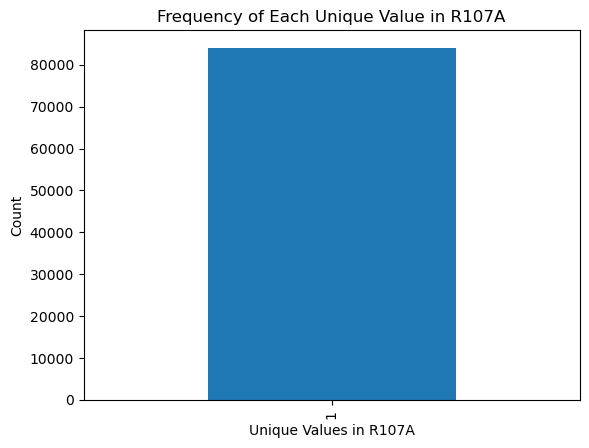

In [77]:
import matplotlib.pyplot as plt
value_counts = merged_df['R107A'].value_counts()


value_counts.plot(kind='bar')
plt.xlabel('Unique Values in R107A')
plt.ylabel('Count')
plt.title('Frequency of Each Unique Value in R107A')
plt.show()


## From the above analysis we can get to know that all the villages are operational


## To thoroughly explore the concept of village leadership, we aim to analyze the prevalence of village heads across different communities, examine the age range among these leaders, assess the balance of genders within these roles, and understand the educational background common among village heads. This investigation seeks to uncover detailed insights into the demographic and educational composition of village leadership.

## R1301AK2 : Existence: Village Head
## R1301AK3 : Age of Village Head
## R1301AK4 : Gender of Village Head
## R1301AK4 : Highest Education completed by Village head


In [134]:
villages_with_head = merged_df['R1301AK2'].value_counts()
villages_with_head

R1301AK2
1    78101
2     5937
Name: count, dtype: int64

In [135]:
rslt_df = merged_df[merged_df['R1301AK2'] == 1] 
rslt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78101 entries, 0 to 84037
Columns: 375 entries, R101 to R1302B
dtypes: float64(37), int64(330), object(8)
memory usage: 224.0+ MB


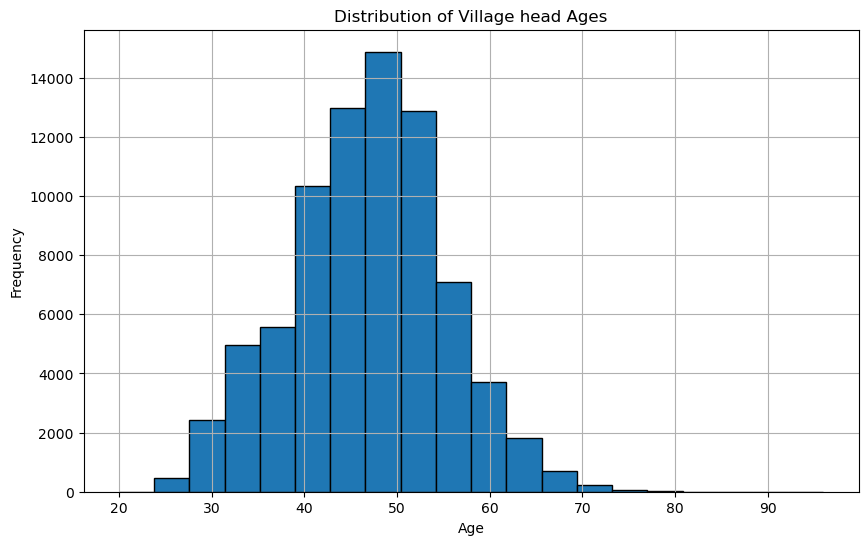

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
rslt_df['R1301AK3'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Village head Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


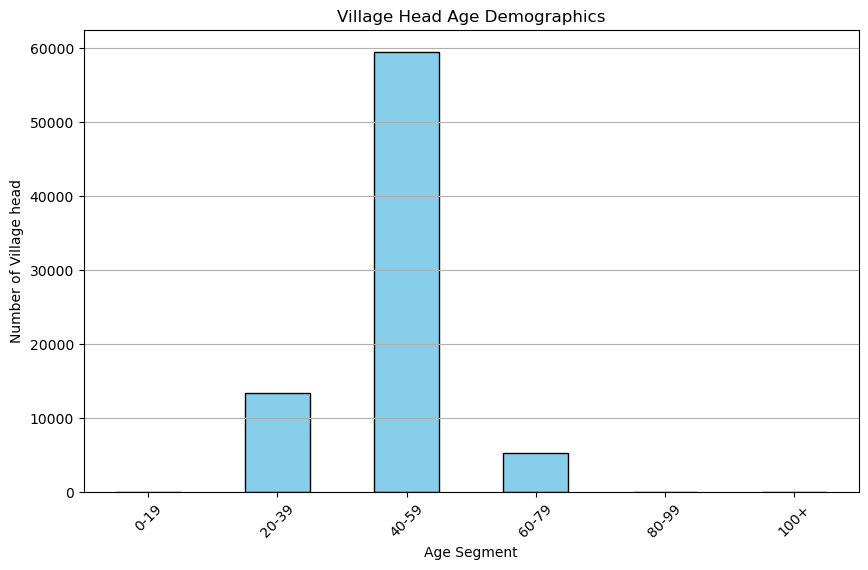

In [146]:
import pandas as pd
import matplotlib.pyplot as plt


bins = [0, 19, 39, 59, 79, 99, 120]  # Adjust the last bin as needed to cover the oldest ages
labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100+']

age_segments = pd.cut(rslt_df['R1301AK3'], bins=bins, labels=labels, right=False)

segment_counts = age_segments.value_counts(sort=False)

plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Village Head Age Demographics')
plt.xlabel('Age Segment')
plt.ylabel('Number of Village head')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


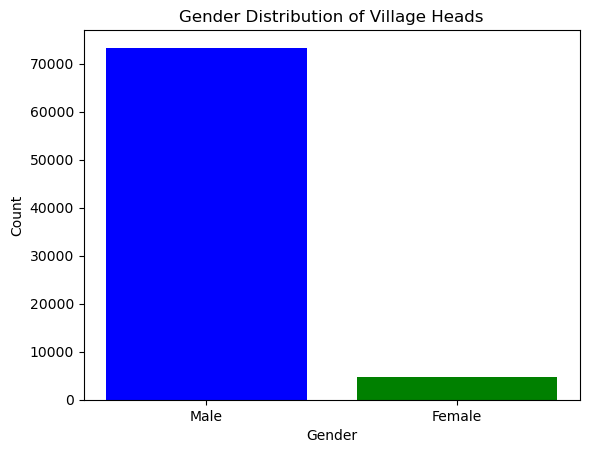

In [138]:
import matplotlib.pyplot as plt

Gender_of_head = rslt_df['R1301AK4'].value_counts()
colors = ['blue', 'green']
plt.bar(Gender_of_head.index, Gender_of_head.values, color=colors)

plt.xlabel('Gender') 
plt.ylabel('Count')
plt.title('Gender Distribution of Village Heads')
plt.xticks(ticks=Gender_of_head.index, labels=['Male', 'Female'])  # Adjust labels as necessary

plt.show()


In [139]:
education_of_head

R1301AK5
5    44374
7    20036
4     5725
8     2544
6     2294
3     1665
2     1170
1      274
9       19
Name: count, dtype: int64

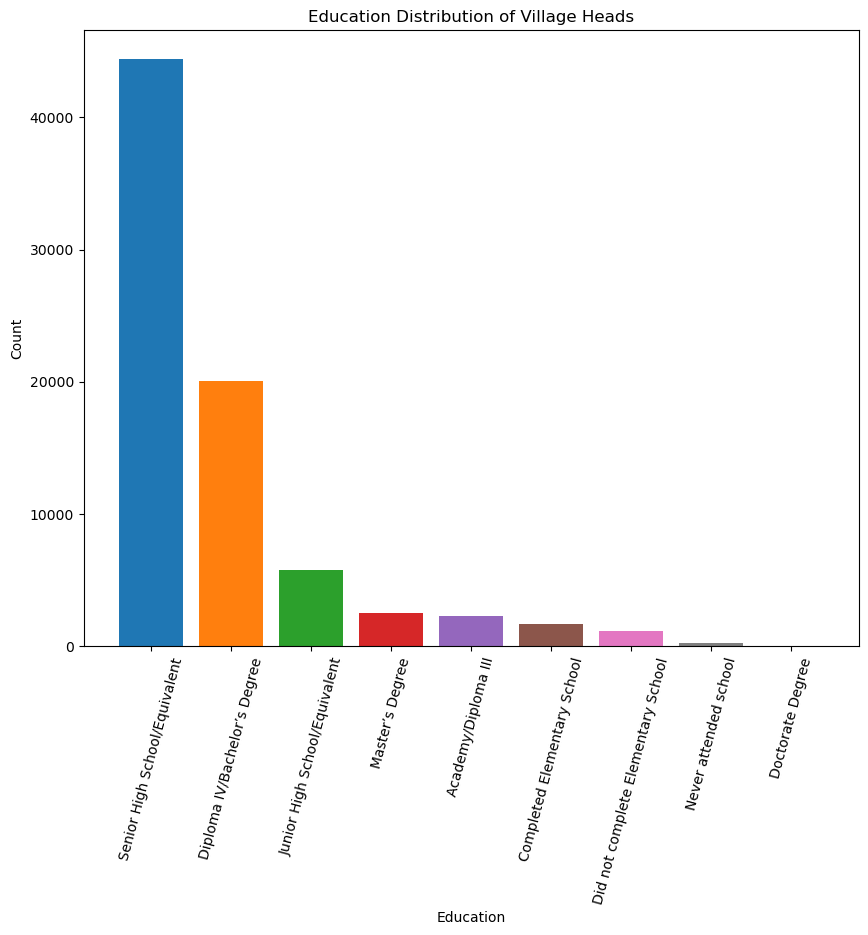

In [140]:
import matplotlib.pyplot as plt
import pandas as pd


education_of_head = rslt_df['R1301AK5'].value_counts()
education_of_head_sorted = education_of_head.sort_index() 


education_labels = {
    1: 'Never attended school',
    2: 'Did not complete Elementary School',
    3: 'Completed Elementary School',
    4: 'Junior High School/Equivalent',
    5: 'Senior High School/Equivalent',
    6: 'Academy/Diploma III',
    7: 'Diploma IV/Bachelor’s Degree',
    8: 'Master’s Degree',
    9: 'Doctorate Degree'
}


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

education_of_head_sorted.index = education_of_head_sorted.index.map(education_labels)
education_of_head_sorted = education_of_head_sorted.sort_values(ascending=False)  

plt.figure(figsize=(10, 8))
plt.bar(education_of_head_sorted.index, education_of_head_sorted.values, color=colors[:len(education_of_head_sorted)])

plt.xlabel('Education') 
plt.ylabel('Count')
plt.title('Education Distribution of Village Heads')
plt.xticks(rotation=75) 

plt.show()


## To thoroughly explore the concept of village Secretary, we aim to analyze the prevalence of village Secretary across different communities, examine the age range among these Secretary, assess the balance of genders within these roles, and understand the educational background common among village Secretary. This investigation seeks to uncover detailed insights into the demographic and educational composition of village Secretary.

## R1301BK2 : Existence: Village Secretary
## R1301BK3 : Age of Village Secretary
## R1301BK4 : Gender of Village Secretary
## R1301BK4 : Highest Education completed by Village Secretary


In [141]:
villages_with_head = merged_df['R1301BK2'].value_counts()
villages_with_head

R1301BK2
1    79653
2     4385
Name: count, dtype: int64

In [142]:
rslt_df_1 = merged_df[merged_df['R1301BK2'] == 1] 
rslt_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79653 entries, 0 to 84037
Columns: 375 entries, R101 to R1302B
dtypes: float64(37), int64(330), object(8)
memory usage: 228.5+ MB


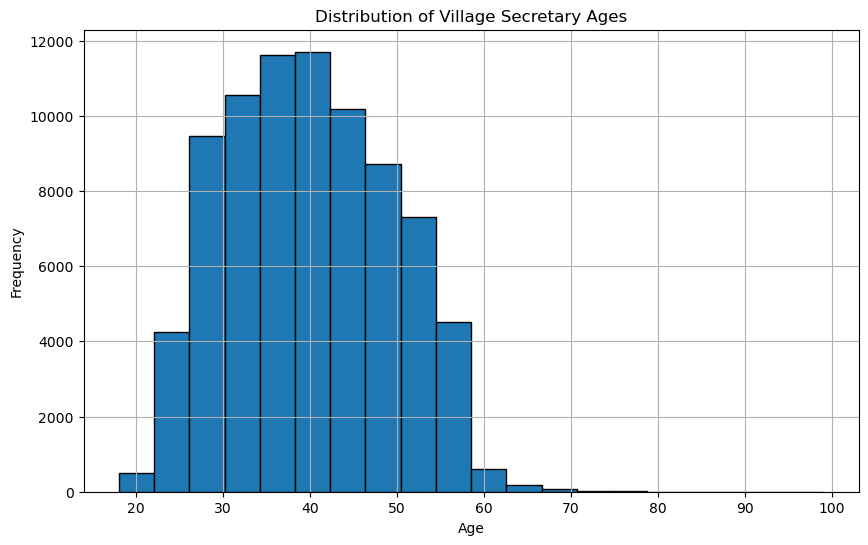

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
rslt_df_1['R1301BK3'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Village Secretary Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


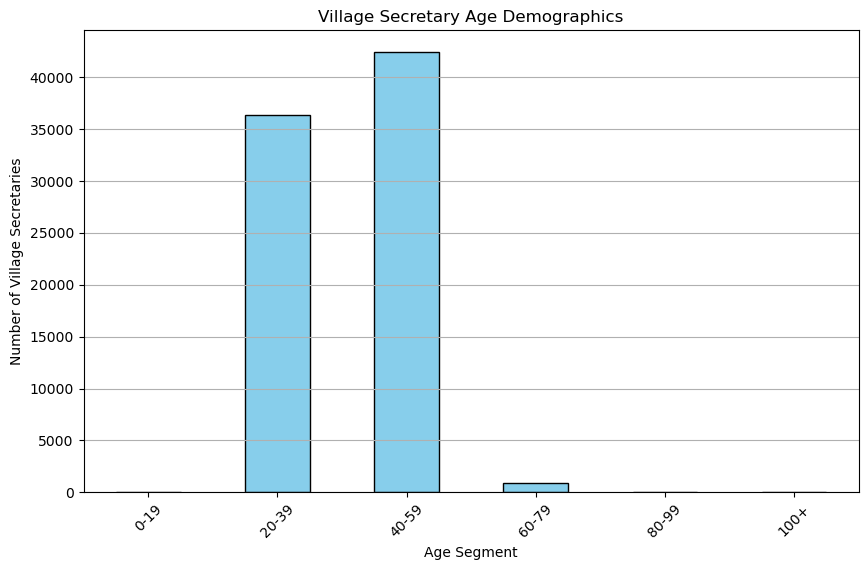

In [147]:
import pandas as pd
import matplotlib.pyplot as plt


bins = [0, 19, 39, 59, 79, 99, 120]  # Adjust the last bin as needed to cover the oldest ages
labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100+']

age_segments = pd.cut(rslt_df_1['R1301BK3'], bins=bins, labels=labels, right=False)

segment_counts = age_segments.value_counts(sort=False)

plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Village Secretary Age Demographics')
plt.xlabel('Age Segment')
plt.ylabel('Number of Village Secretaries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


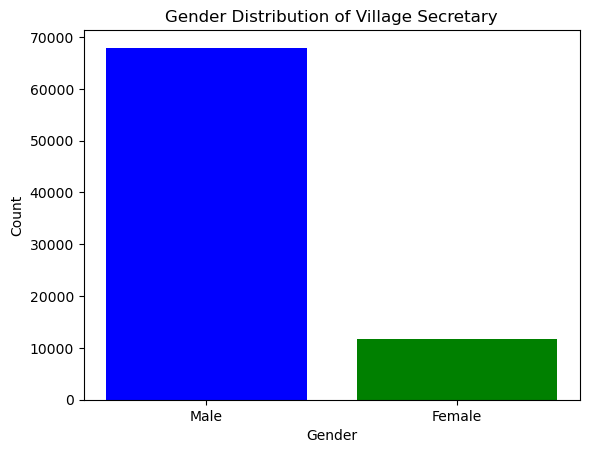

In [148]:
import matplotlib.pyplot as plt

Gender_of_sec = rslt_df_1['R1301BK4'].value_counts()
colors = ['blue', 'green']
plt.bar(Gender_of_sec.index, Gender_of_sec.values, color=colors)

plt.xlabel('Gender') 
plt.ylabel('Count')
plt.title('Gender Distribution of Village Secretary')
plt.xticks(ticks=Gender_of_sec.index, labels=['Male', 'Female'])  

plt.show()


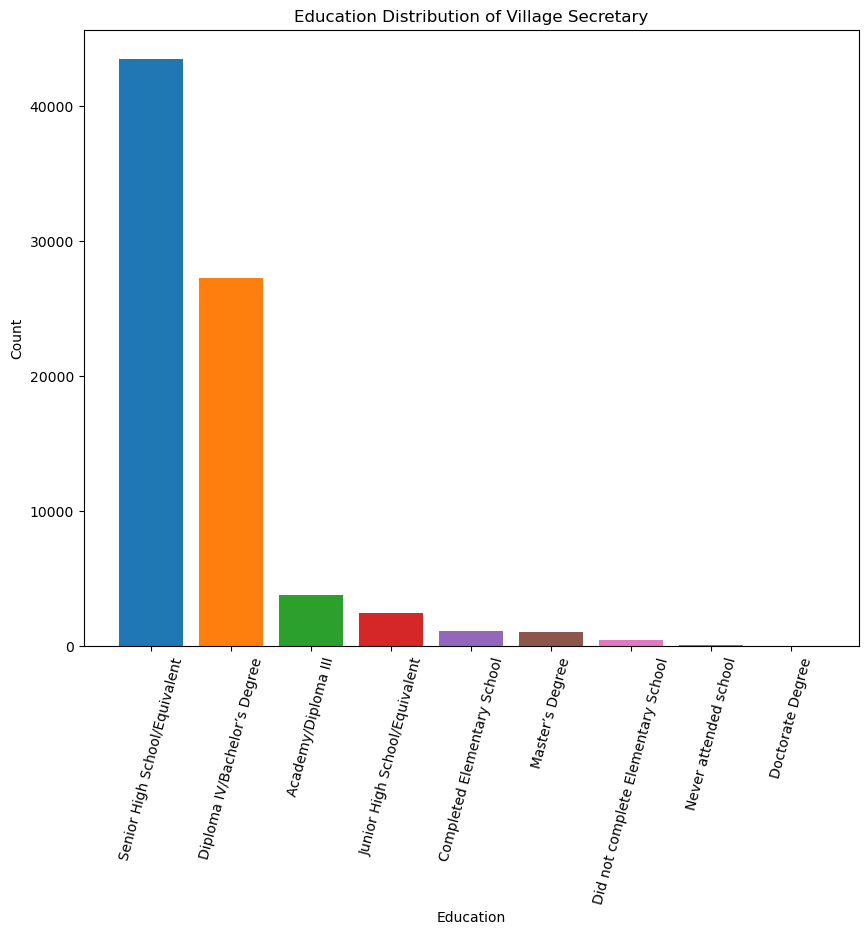

In [149]:
import matplotlib.pyplot as plt
import pandas as pd


education_of_sec = rslt_df_1['R1301BK5'].value_counts()
education_of_sec_sorted = education_of_sec.sort_index() 


education_labels = {
    1: 'Never attended school',
    2: 'Did not complete Elementary School',
    3: 'Completed Elementary School',
    4: 'Junior High School/Equivalent',
    5: 'Senior High School/Equivalent',
    6: 'Academy/Diploma III',
    7: 'Diploma IV/Bachelor’s Degree',
    8: 'Master’s Degree',
    9: 'Doctorate Degree'
}


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

education_of_sec_sorted.index = education_of_sec_sorted.index.map(education_labels)
education_of_sec_sorted = education_of_sec_sorted.sort_values(ascending=False)  

plt.figure(figsize=(10, 8))
plt.bar(education_of_sec_sorted.index, education_of_sec_sorted.values, color=colors[:len(education_of_sec_sorted)])

plt.xlabel('Education') 
plt.ylabel('Count')
plt.title('Education Distribution of Village Secretary')
plt.xticks(rotation=75) 

plt.show()


## Education 

In [184]:

column_codes = [
    'R601AK2', 'R601AK3', 'R601AK4', 'R601AK5',
    'R601BK2', 'R601BK3', 'R601BK4', 'R601BK5',
    'R601CK2', 'R601CK3', 'R601CK4', 'R601CK5',
    'R601DK2', 'R601DK3', 'R601DK4', 'R601DK5',
    'R601EK2', 'R601EK3', 'R601EK4', 'R601EK5',
    'R601FK2', 'R601FK3', 'R601FK4', 'R601FK5',
    'R601GK2', 'R601GK3', 'R601GK4', 'R601GK5',
    'R601HK2', 'R601HK3', 'R601HK4', 'R601HK5',
    'R601IK2', 'R601IK3', 'R601IK4', 'R601IK5',
    'R601JK2', 'R601JK3', 'R601JK4', 'R601JK5',
    'R601KK2', 'R601KK3', 'R601KK4', 'R601KK5'
]


state_cols = [code for code in column_codes if 'K2' in code]
private_cols = [code for code in column_codes if 'K3' in code]
distance_cols = [code for code in column_codes if 'K4' in code]
ease_access_cols = [code for code in column_codes if 'K5' in code]


state_df = merged_df[state_cols]
private_df = merged_df[private_cols]
distance_df = merged_df[distance_cols]
ease_access_df = merged_df[ease_access_cols]

mean_distance = distance_df.mean()

ease_access_frequency = ease_access_df.apply(pd.Series.value_counts)

mean_distance, ease_access_frequency


(R601AK4     4.490606
 R601BK4     5.250088
 R601CK4    21.145076
 R601DK4     0.728511
 R601EK4    17.991368
 R601FK4     3.491091
 R601GK4    16.652982
 R601HK4     8.500903
 R601IK4    21.727887
 R601JK4    13.859706
 R601KK4    33.159211
 dtype: float64,
    R601AK5  R601BK5  R601CK5  R601DK5  R601EK5  R601FK5  R601GK5  R601HK5  R601IK5  R601JK5  R601KK5
 0    63439    52071    19219    71134    20212    30722    15605    11768     8105    10838     3098
 1     3718     6289     8836     4604    10080    14322    12427    14577    11828    12476     7553
 2    10071    16114    33303     6480    33954    32607    38001    45380    42454    43481    43782
 3     3794     6513    13005     1261    11621     4896    10344     9166    12506    12057    18456
 4     3016     3051     9675      559     8171     1491     7661     3147     9145     5186    11149)

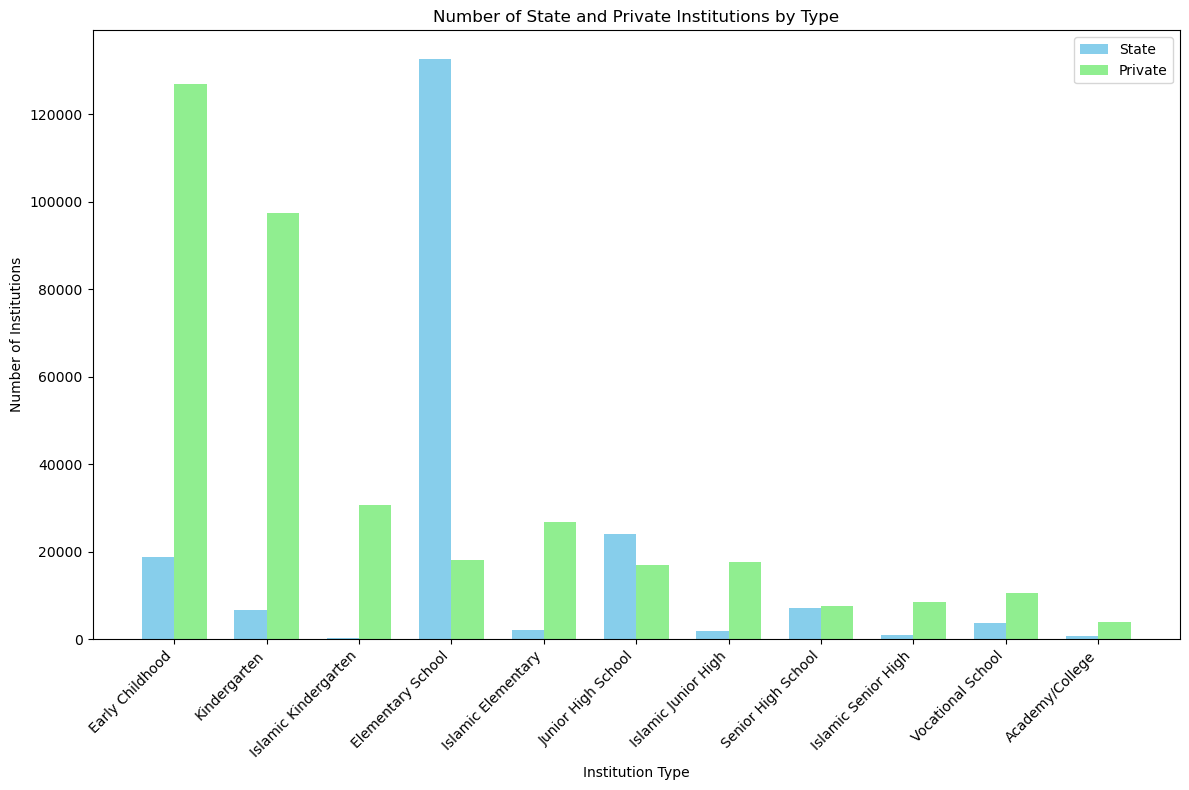

In [191]:
import matplotlib.pyplot as plt
import numpy as np

institution_types = [
    'Early Childhood', 'Kindergarten', 'Islamic Kindergarten', 
    'Elementary School', 'Islamic Elementary', 'Junior High School', 
    'Islamic Junior High', 'Senior High School', 'Islamic Senior High', 
    'Vocational School', 'Academy/College'
]

state_counts = merged_df[[f'R601{i}K2' for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']]].sum()
private_counts = merged_df[[f'R601{i}K3' for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']]].sum()

fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(institution_types))
bar_width = 0.35

state_bars = ax.bar(index - bar_width/2, state_counts, bar_width, label='State', color='skyblue')
private_bars = ax.bar(index + bar_width/2, private_counts, bar_width, label='Private', color='lightgreen')

ax.set_xlabel('Institution Type')
ax.set_ylabel('Number of Institutions')
ax.set_title('Number of State and Private Institutions by Type')
ax.set_xticks(index)
ax.set_xticklabels(institution_types, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


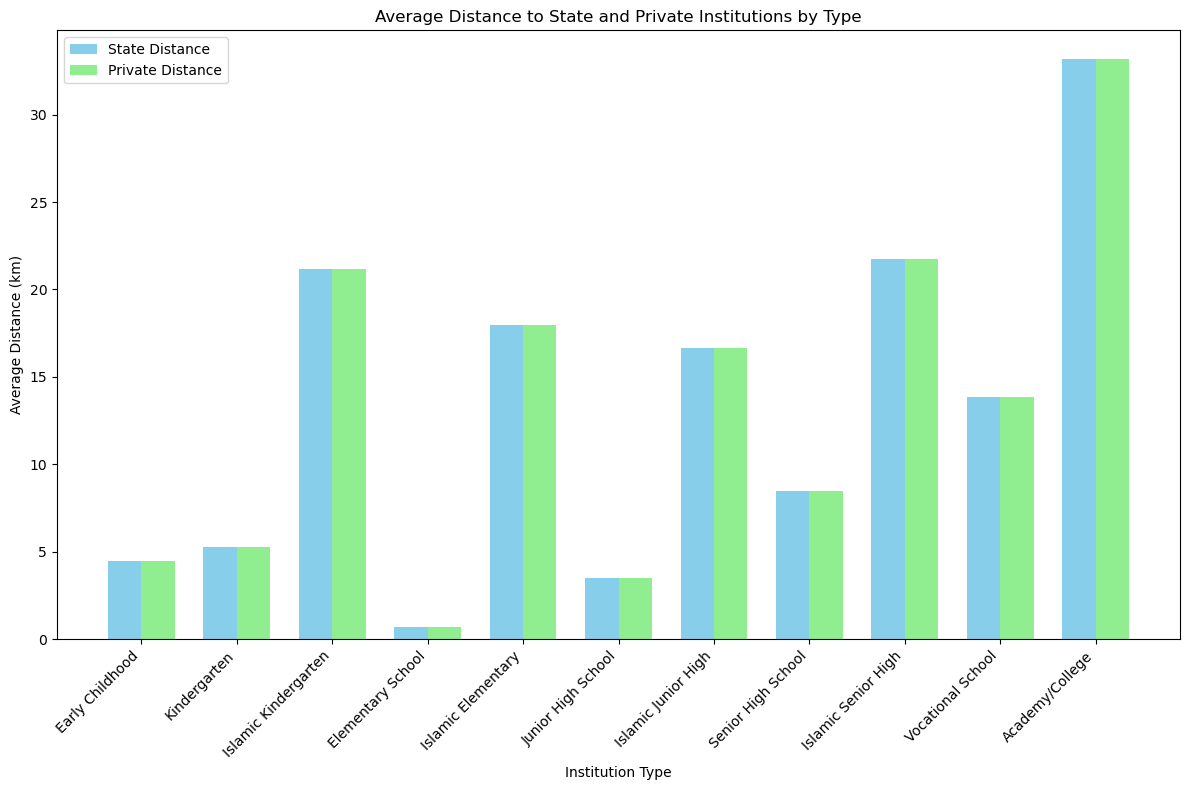

In [192]:
state_distance_means = merged_df[[f'R601{i}K4' for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']]].mean()
private_distance_means = merged_df[[f'R601{i}K4' for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']]].mean()

fig, ax = plt.subplots(figsize=(12, 8))

state_distance_bars = ax.bar(index - bar_width/2, state_distance_means, bar_width, label='State Distance', color='skyblue')
private_distance_bars = ax.bar(index + bar_width/2, private_distance_means, bar_width, label='Private Distance', color='lightgreen')

ax.set_xlabel('Institution Type')
ax.set_ylabel('Average Distance (km)')
ax.set_title('Average Distance to State and Private Institutions by Type')
ax.set_xticks(index)
ax.set_xticklabels(institution_types, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


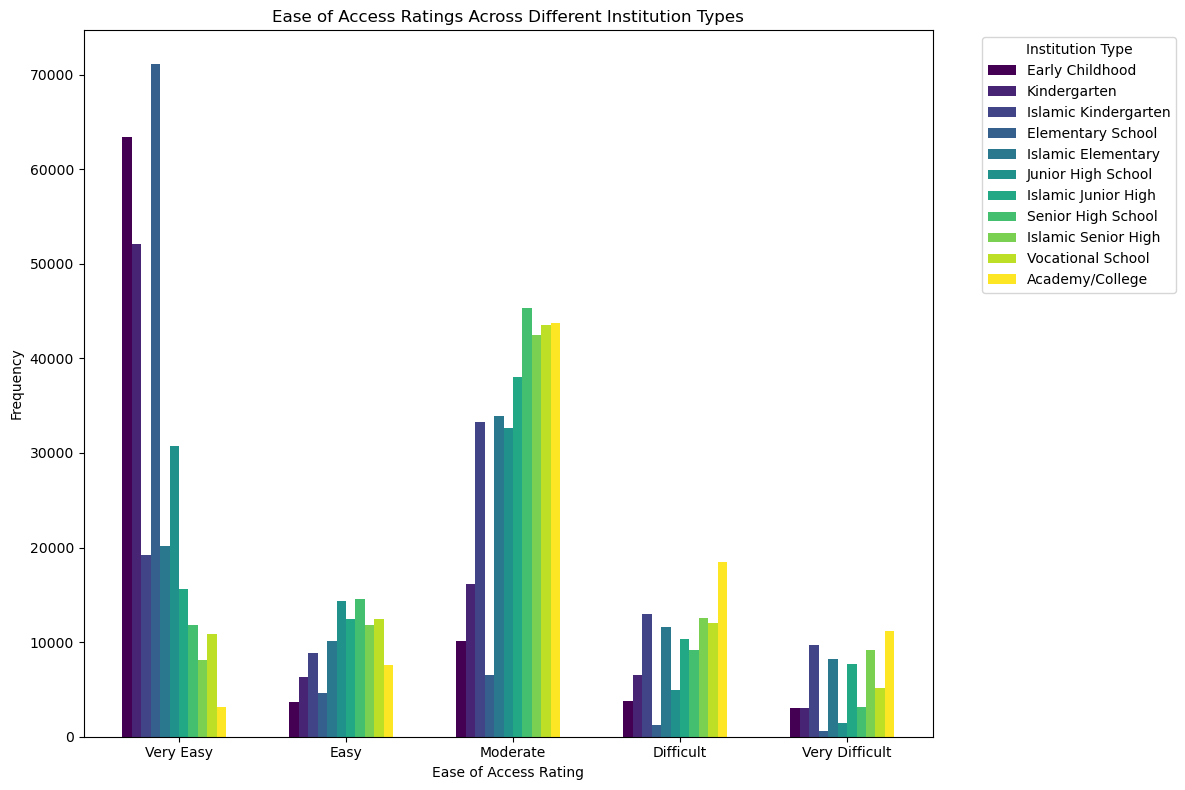

In [201]:
import matplotlib.pyplot as plt
import numpy as np


ease_access_columns = [
    'R601AK5', 'R601BK5', 'R601CK5', 'R601DK5', 'R601EK5',
    'R601FK5', 'R601GK5', 'R601HK5', 'R601IK5', 'R601JK5', 'R601KK5'
]

institution_labels = [
    'Early Childhood', 'Kindergarten', 'Islamic Kindergarten',
    'Elementary School', 'Islamic Elementary', 'Junior High School',
    'Islamic Junior High', 'Senior High School', 'Islamic Senior High',
    'Vocational School', 'Academy/College'
]

ease_of_access_data = {}

for col, label in zip(ease_access_columns, institution_labels):
    ease_of_access_data[label] = merged_df[col].value_counts().sort_index()


num_ratings = 5  


bar_width = 0.15 
spacing_between_groups = 1  
num_institutions = len(institution_labels)

colors = plt.cm.viridis(np.linspace(0, 1, num_institutions))

group_positions = np.arange(num_ratings) * (num_institutions * bar_width + spacing_between_groups)

fig, ax = plt.subplots(figsize=(12, 8))

for i, (institution, counts) in enumerate(ease_of_access_data.items()):
    bar_positions = group_positions + i * bar_width
    ax.bar(bar_positions, counts, width=bar_width, color=colors[i], label=institution)

ax.set_xticks(group_positions + bar_width * num_institutions / 2)
ax.set_xticklabels(['Very Easy', 'Easy', 'Moderate', 'Difficult', 'Very Difficult'])

ax.set_xlabel('Ease of Access Rating')
ax.set_ylabel('Frequency')
ax.set_title('Ease of Access Ratings Across Different Institution Types')
ax.legend(title="Institution Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [206]:
import matplotlib.pyplot as plt

# Summarizing the data
electricity_usage = {
    'PLN Electricity': merged_df['R501A1'].sum(),
    'Non-PLN Electricity': merged_df['R501A2'].sum(),
    'No Electricity': merged_df['R501B'].sum()
}



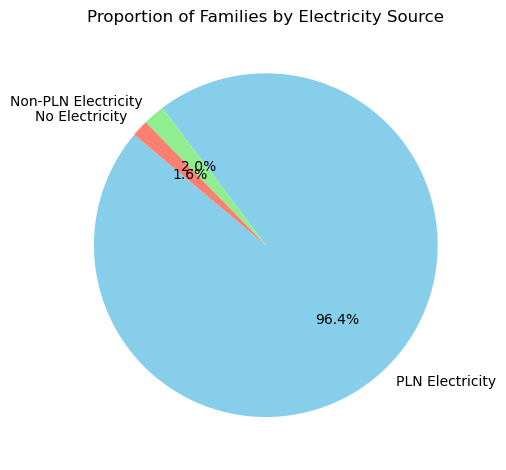

In [207]:
# Creating the pie chart
fig, ax = plt.subplots()
ax.pie(electricity_usage.values(), labels=electricity_usage.keys(), autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])

# Adding a title
ax.set_title('Proportion of Families by Electricity Source')

plt.tight_layout()
plt.show()


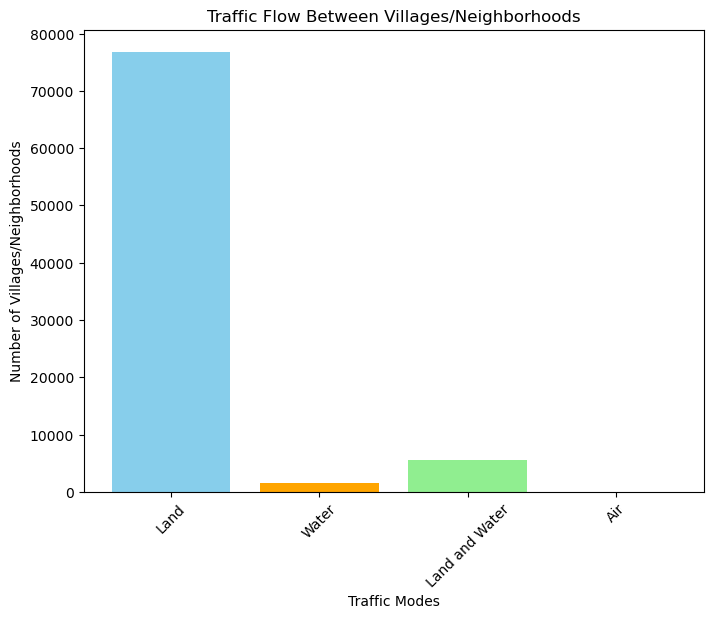

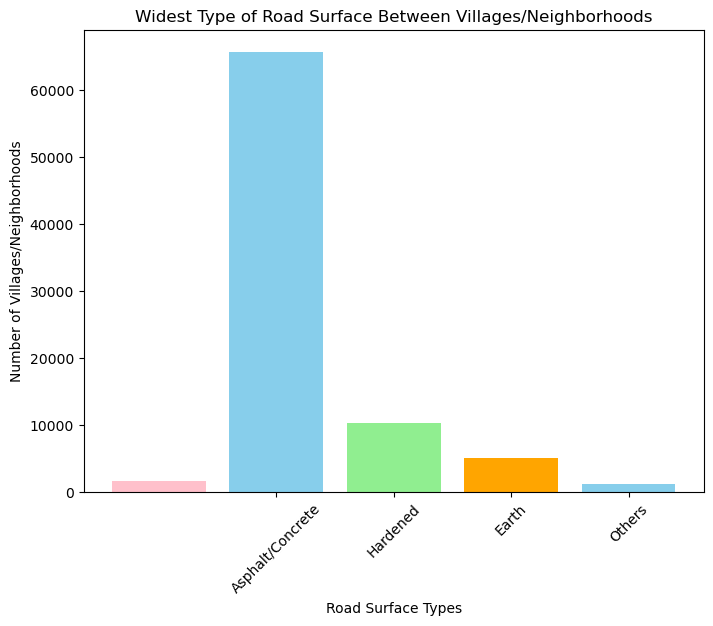

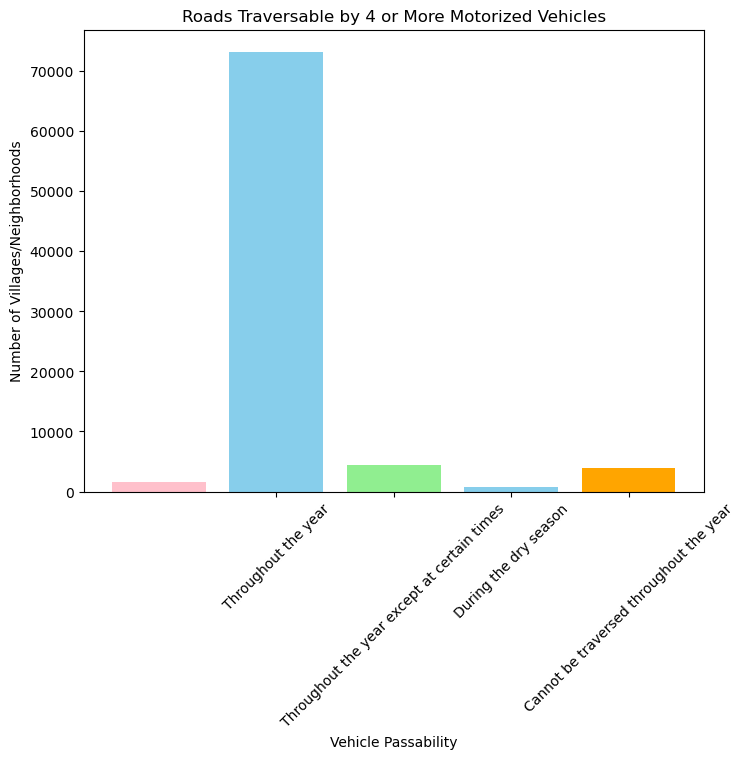

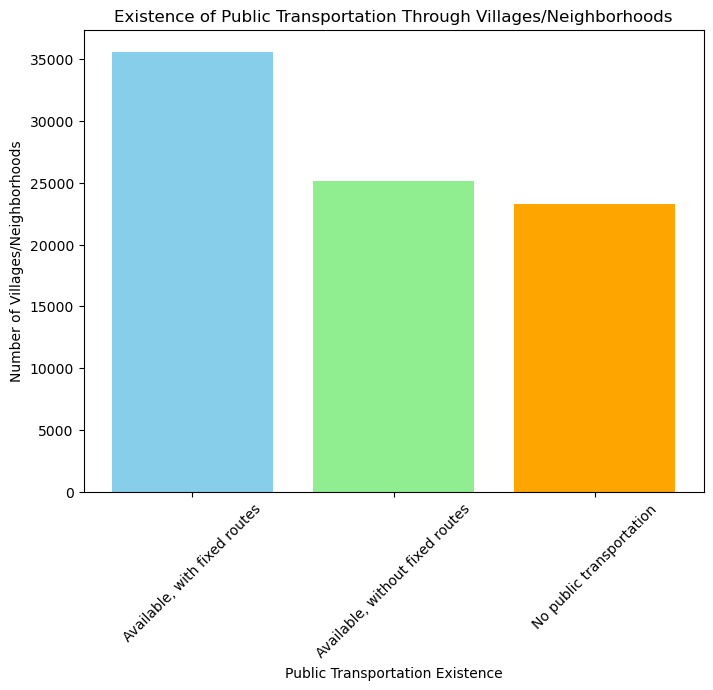

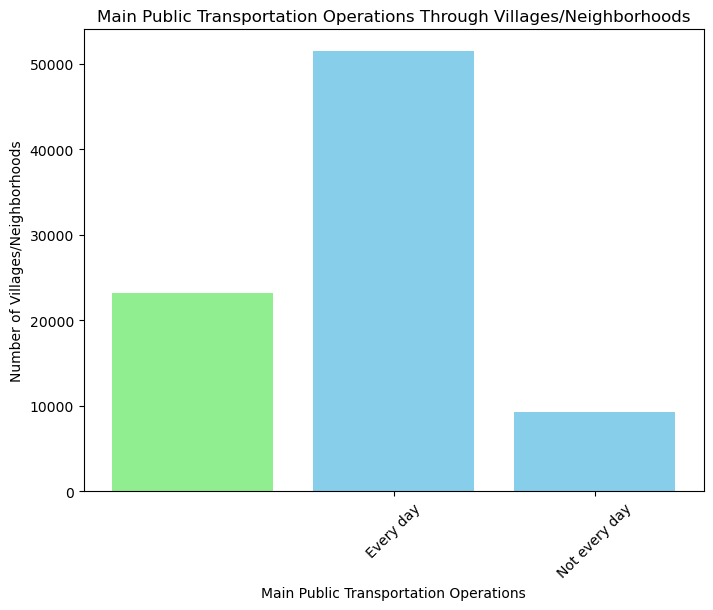

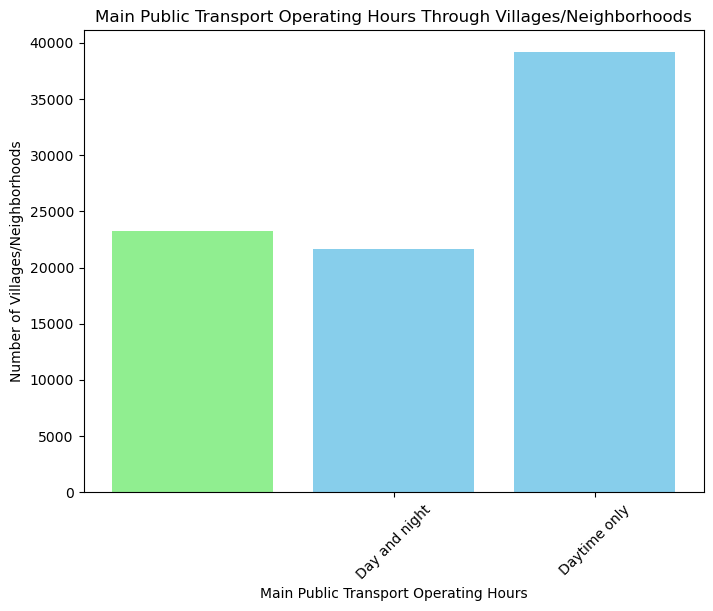

In [217]:
import pandas as pd
import matplotlib.pyplot as plt


traffic_modes = merged_df['R801A'].value_counts()
traffic_modes = traffic_modes[traffic_modes != 0]
plt.figure(figsize=(8, 6))
plt.bar(traffic_modes.index, traffic_modes.values, color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.xlabel('Traffic Modes')
plt.ylabel('Number of Villages/Neighborhoods')
plt.title('Traffic Flow Between Villages/Neighborhoods')
plt.xticks(range(1, 5), ['Land', 'Water', 'Land and Water', 'Air'], rotation=45)
plt.show()


road_surface_types = merged_df['R801B1'].value_counts()
road_surface_types = road_surface_types[road_surface_types != 0] 
plt.figure(figsize=(8, 6))
plt.bar(road_surface_types.index, road_surface_types.values, color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.xlabel('Road Surface Types')
plt.ylabel('Number of Villages/Neighborhoods')
plt.title('Widest Type of Road Surface Between Villages/Neighborhoods')
plt.xticks(range(1, 5), ['Asphalt/Concrete', 'Hardened', 'Earth', 'Others'], rotation=45)
plt.show()


vehicle_passability = merged_df['R801B2'].value_counts()
vehicle_passability = vehicle_passability[vehicle_passability != 0] 
plt.figure(figsize=(8, 6))
plt.bar(vehicle_passability.index, vehicle_passability.values, color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.xlabel('Vehicle Passability')
plt.ylabel('Number of Villages/Neighborhoods')
plt.title('Roads Traversable by 4 or More Motorized Vehicles')
plt.xticks(range(1, 5), ['Throughout the year', 'Throughout the year except at certain times', 'During the dry season', 'Cannot be traversed throughout the year'], rotation=45)
plt.show()


public_transport_existence = merged_df['R801C1'].value_counts()
public_transport_existence = public_transport_existence[public_transport_existence != 0] 
plt.figure(figsize=(8, 6))
plt.bar(public_transport_existence.index, public_transport_existence.values, color=['skyblue', 'lightgreen', 'orange'])
plt.xlabel('Public Transportation Existence')
plt.ylabel('Number of Villages/Neighborhoods')
plt.title('Existence of Public Transportation Through Villages/Neighborhoods')
plt.xticks(range(1, 4), ['Available, with fixed routes', 'Available, without fixed routes', 'No public transportation'], rotation=45)
plt.show()


public_transport_operations = merged_df['R801C2'].value_counts()
public_transport_operations = public_transport_operations[public_transport_operations != 0] 
plt.figure(figsize=(8, 6))
plt.bar(public_transport_operations.index, public_transport_operations.values, color=['skyblue', 'lightgreen'])
plt.xlabel('Main Public Transportation Operations')
plt.ylabel('Number of Villages/Neighborhoods')
plt.title('Main Public Transportation Operations Through Villages/Neighborhoods')
plt.xticks(range(1, 3), ['Every day', 'Not every day'], rotation=45)
plt.show()


public_transport_hours = merged_df['R801C3'].value_counts()
public_transport_hours = public_transport_hours[public_transport_hours != 0] 
plt.figure(figsize=(8, 6))
plt.bar(public_transport_hours.index, public_transport_hours.values, color=['skyblue', 'lightgreen'])
plt.xlabel('Main Public Transport Operating Hours')
plt.ylabel('Number of Villages/Neighborhoods')
plt.title('Main Public Transport Operating Hours Through Villages/Neighborhoods')
plt.xticks(range(1, 3), ['Day and night', 'Daytime only'], rotation=45)
plt.show()


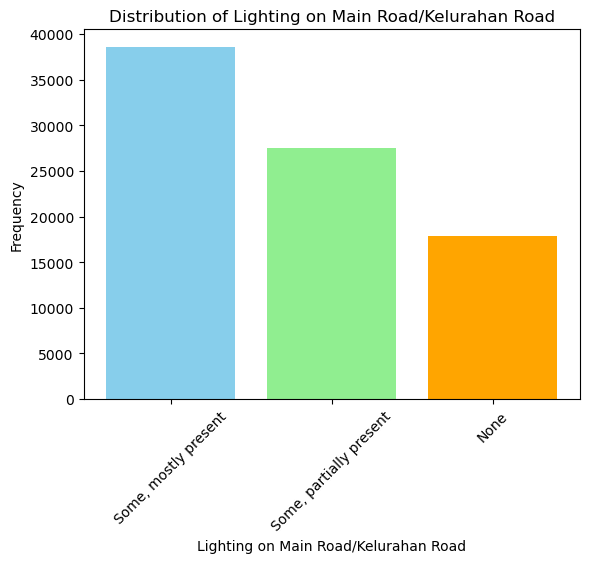

In [225]:
import matplotlib.pyplot as plt

lighting_counts = merged_df['R502A'].value_counts()


labels = ['Some, mostly present', 'Some, partially present', 'None']

plt.bar(labels, lighting_counts, color=['skyblue', 'lightgreen', 'orange'])


plt.xlabel('Lighting on Main Road/Kelurahan Road')
plt.ylabel('Frequency')
plt.title('Distribution of Lighting on Main Road/Kelurahan Road')

plt.xticks(rotation=45)


plt.show()
